# <span style="color: gray;"> QCTO - Workplace Module

### <span style="color: gray;"> Project Title: Profit scoring 
#### <span style="color: gray;"> Done By: Vuyiswa Kubalasa 

© ExploreAI 2024

<hr style="border: 3px solid gray;">

## Table of Contents

<a id = "cont"></a>

[Background Context](#Background-Context)

[1. Importing Packages](#Importing-Packages)

[2. Data Collection and Description](#Data-Collection-and-Description)

[3. Loading Data](#Loading-Data)

[4. Data Cleaning and Filtering](#Data-Cleaning-and-Filtering)

[5. Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))

[6. Modeling](#Modeling)

[7. Evaluation and Validation](#Evaluation-and-Validation)

[8. Final Model](#Final-Model)

[9. Conclusion and Future Work](#Conclusion-and-Future-Work)

[10. References](#References)


---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

Banks and other credit lending institutions have a large cutsomer base with varying behavioural characteristics in terms of spend behaviour, revolving behaviour, age, disposal income, etc. Most of the institutions focus predominantly on booking clients with a low probability of defaulting, rightfully so given the risk involved in borrowing money. 

However, the primary purpose of business lending money is to make a profit and there a few banks actively looking into whether the clients they are booking are likely to be profitable or not, rather than merely charging high rates to potentional defaulters. This project aims to indicate to stakeholders that a good balance of expected risk and expected profitability should be considered. Similar to scorecards that measure risk of defaulting, we develop a profit scoring method to determine profit scores and explore the use of machine learning models in predicting these profit scores.

**Project objective**: The main objective of this project is to build a profit scoring systems that helps to identify high value clients (high profitability with low to medium risk of defaulting). Profit score in this sense refers to the probability of generating high profitability. The main questions we aim to answer is:
> 1) Is there a standard way to score a customers relative profitability, to determine high profitable clients ?
> 2) Can we predict profit scores from given variables, which will in turn help us understand what customers segments are likely to result in high profitability ?

**Data Source**: Fictitious data was used, data does not inclde an exhasutive list of variables that could be used to predict scores.

**Importance of study**: Once we are able to reference high profitability to certain segments we will be able to identify highly profitable segments and can use this to suggest incentives to increase profit score as a clients continues to be remain on book.

At the end of this project, the business will gain a comprehensive understanding of how certain customer behaviours or segments influence profitability, the project will help to effectively allocate resources. Instead of spreading resources over all customers, but identifying expected profitability at application b canusinesses can focus various efforts based on profit scores. For identified high value (profitability) clients, the bank can focus on offering personalized rewards to retain these profitable segments. For idenified low value (profitable) clients banks can adjust pricing and product development strategies to maximize profits without losing valuable customers. Furthermore, the project will help in forecasting expected profitability likelihood and making informed decisions about potential investments in customer acquisition and retention.

**Methodology Overview**: Here is a brief overview of the methods and technique we plan to use in the analysis. We will:
> 1) determine a profit score from the profit value given in the data, we convert the probabilities to binary categorization 0 for low profitable client and 10 for high profitable client based on a subjective profitability threshold 
> 2) use regression and classfication model to predict profit scores 
> 3) use upscaling to solve class imbalance issues
> 4) employ grid search and cross validation to find optimal parameters and evaluate robustness of model

**Structure of the Notebook**

![card](notebook_structure_card.png)

---

---
<a id= "one" ></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>


In [1]:
#Regular packages
import pandas as pd 
import numpy as np

#system
import os  # get path of notebook 
import joblib

#Plotting 
import matplotlib.pyplot as plt
import seaborn as sns

#ML algorithm/ models
from sklearn.linear_model import LinearRegression,Lasso, Ridge, LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.svm import SVR, SVC

#import tensorflow as tf 
#from tensorflow.keras.models import Sequential 
#from tensorflow.keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier

#Evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn import metrics 
from scipy.stats import pearsonr

#Improvements 
from sklearn.utils import resample

---
<a id=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

The source the data data, we conducted some web scraping for credit card datasets and examined some dataset from github repositories, this data although it does not have all the fields we hoping for to conduct a comprehensive analysis, it contains the necessarily fields in comparison to the other credit card datasets. The data was source from [kaggle](https://www.kaggle.com/code/shawkyelgendy/credit-card-cs-eda-and-ml/notebook), it consists of aggregated credit card data including the customers total spend and balance throughout the lifetime of having the card. There are 10127 entries and 23 columns in total, an indepth data dictionary can be found [here](https://github.com/VuyiswaK/Workplace_project/blob/main/README.md).


---
<a id="three"></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>


In [2]:
path_all = os.getcwd()
df = pd.read_csv(path_all + '/data.csv')

In [3]:
df.head()

Id Account_status    Salary  Internal_PD  External_PD  Loan_amount  Profit  \
0  11       In_order  240000.0     0.051143     0.204545      16900.0   -5.89   
1  19       In_order  360000.0     0.019587     0.539773      36000.0  547.10   
2  22       In_order  893532.0     0.116431     0.357955      79900.0  384.87   
3  24       In_order  254376.0     0.488575     0.323864      20000.0 -509.66   
4  27       In_order  120000.0     0.008161     0.147727      23800.0  511.47   

   Banking_with_bank  Months_on_book  External_utilisation  \
0                  1            67.0              0.241335   
1                  1            20.0              0.370775   
2                  1           122.0              0.866172   
3                  1            18.0              0.327666   
4                  0            74.0              0.241431   

   Internal_utilisation  Spend_percentage  Probability  Profit_score  
0              0.750759          0.016166     0.377578           4.0  
1              0.616521          0.009537     0.480096           5.0  
2              0.842748          0.006621     0.304842           4.0  
3              0.511176          0.136263     0.244923           3.0  
4              0.287635          0.287312     0.564953           6.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23455 entries, 0 to 23454
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    23455 non-null  int64  
 1   Account_status        23455 non-null  object 
 2   Salary                23455 non-null  float64
 3   Internal_PD           23455 non-null  float64
 4   External_PD           23455 non-null  float64
 5   Loan_amount           23455 non-null  float64
 6   Profit                23455 non-null  float64
 7   Banking_with_bank     23455 non-null  int64  
 8   Months_on_book        23455 non-null  float64
 9   External_utilisation  23455 non-null  float64
 10  Internal_utilisation  23455 non-null  float64
 11  Spend_percentage      23455 non-null  float64
 12  Probability           23455 non-null  float64
 13  Profit_score          23455 non-null  float64
dtypes: float64(11), int64(2), object(1)
memory usage: 2.5+ MB


---

## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

#### **Check for duplicates**

In [5]:
df_copy = df.copy()  # copy dataframe
df_copy.duplicated().sum()

np.int64(0)


#### **Handle missing values**

In [6]:
for column in df_copy:
    if df_copy[column].isnull().any():
        print('{0} has {1} null values'.format(column, df_copy[column].isnull().sum()))
        
# No missing data 

#### **Check for outliers**

In [7]:
df_copy.describe()

Id        Salary   Internal_PD   External_PD    Loan_amount  \
count   23455.000000  2.345500e+04  23455.000000  23455.000000   23455.000000   
mean    94699.160307  3.929405e+05      0.153750      0.376262   37833.522874   
std     54723.266658  3.692259e+05      0.193380      0.196185   35787.475704   
min        11.000000  6.000000e+04      0.000000      0.000000    2000.000000   
25%     47157.500000  1.800000e+05      0.031012      0.210227   13000.000000   
50%     94601.000000  2.903760e+05      0.072361      0.369318   25000.000000   
75%    142492.000000  4.791420e+05      0.196409      0.528409   50000.000000   
max    189370.000000  4.884000e+06      1.000000      1.000000  200000.000000   

             Profit  Banking_with_bank  Months_on_book  External_utilisation  \
count  23455.000000       23455.000000    23455.000000          23455.000000   
mean     255.438034           0.637220       86.634151              0.517200   
std     1162.875141           0.480812       83.350999              0.306794   
min    -9668.970000           0.000000       13.000000              0.000038   
25%      -36.965000           0.000000       26.000000              0.265914   
50%      159.910000           1.000000       56.000000              0.476296   
75%      448.130000           1.000000      120.000000              0.745333   
max    10152.470000           1.000000      528.000000              1.199987   

       Internal_utilisation  Spend_percentage   Probability  Profit_score  
count          23455.000000      23455.000000  23455.000000  23455.000000  
mean               0.653003          0.185365      0.484279      5.340567  
std                0.261508          0.199841      0.163346      1.655057  
min                0.000287          0.000000      0.001498      1.000000  
25%                0.471907          0.059236      0.391234      4.000000  
50%                0.725800          0.123445      0.468431      5.000000  
75%                0.868665          0.233888      0.563012      6.000000  
max                1.073706          1.422559      0.999494     10.000000

**Remarks**
* The profit variable may have outliers, as the minimum and maximum profit are far from the first and third quantile.
* External PD and spend percentage too may have outlier on the upper end 
* The irregular shape for banking with bank is because it is a binary variable, similar with profit score it is a multi-class discrete variable.
* The five number summary alone, is not enough to identify outliers. We plot violin plots to visually observe outliers from a different lense.

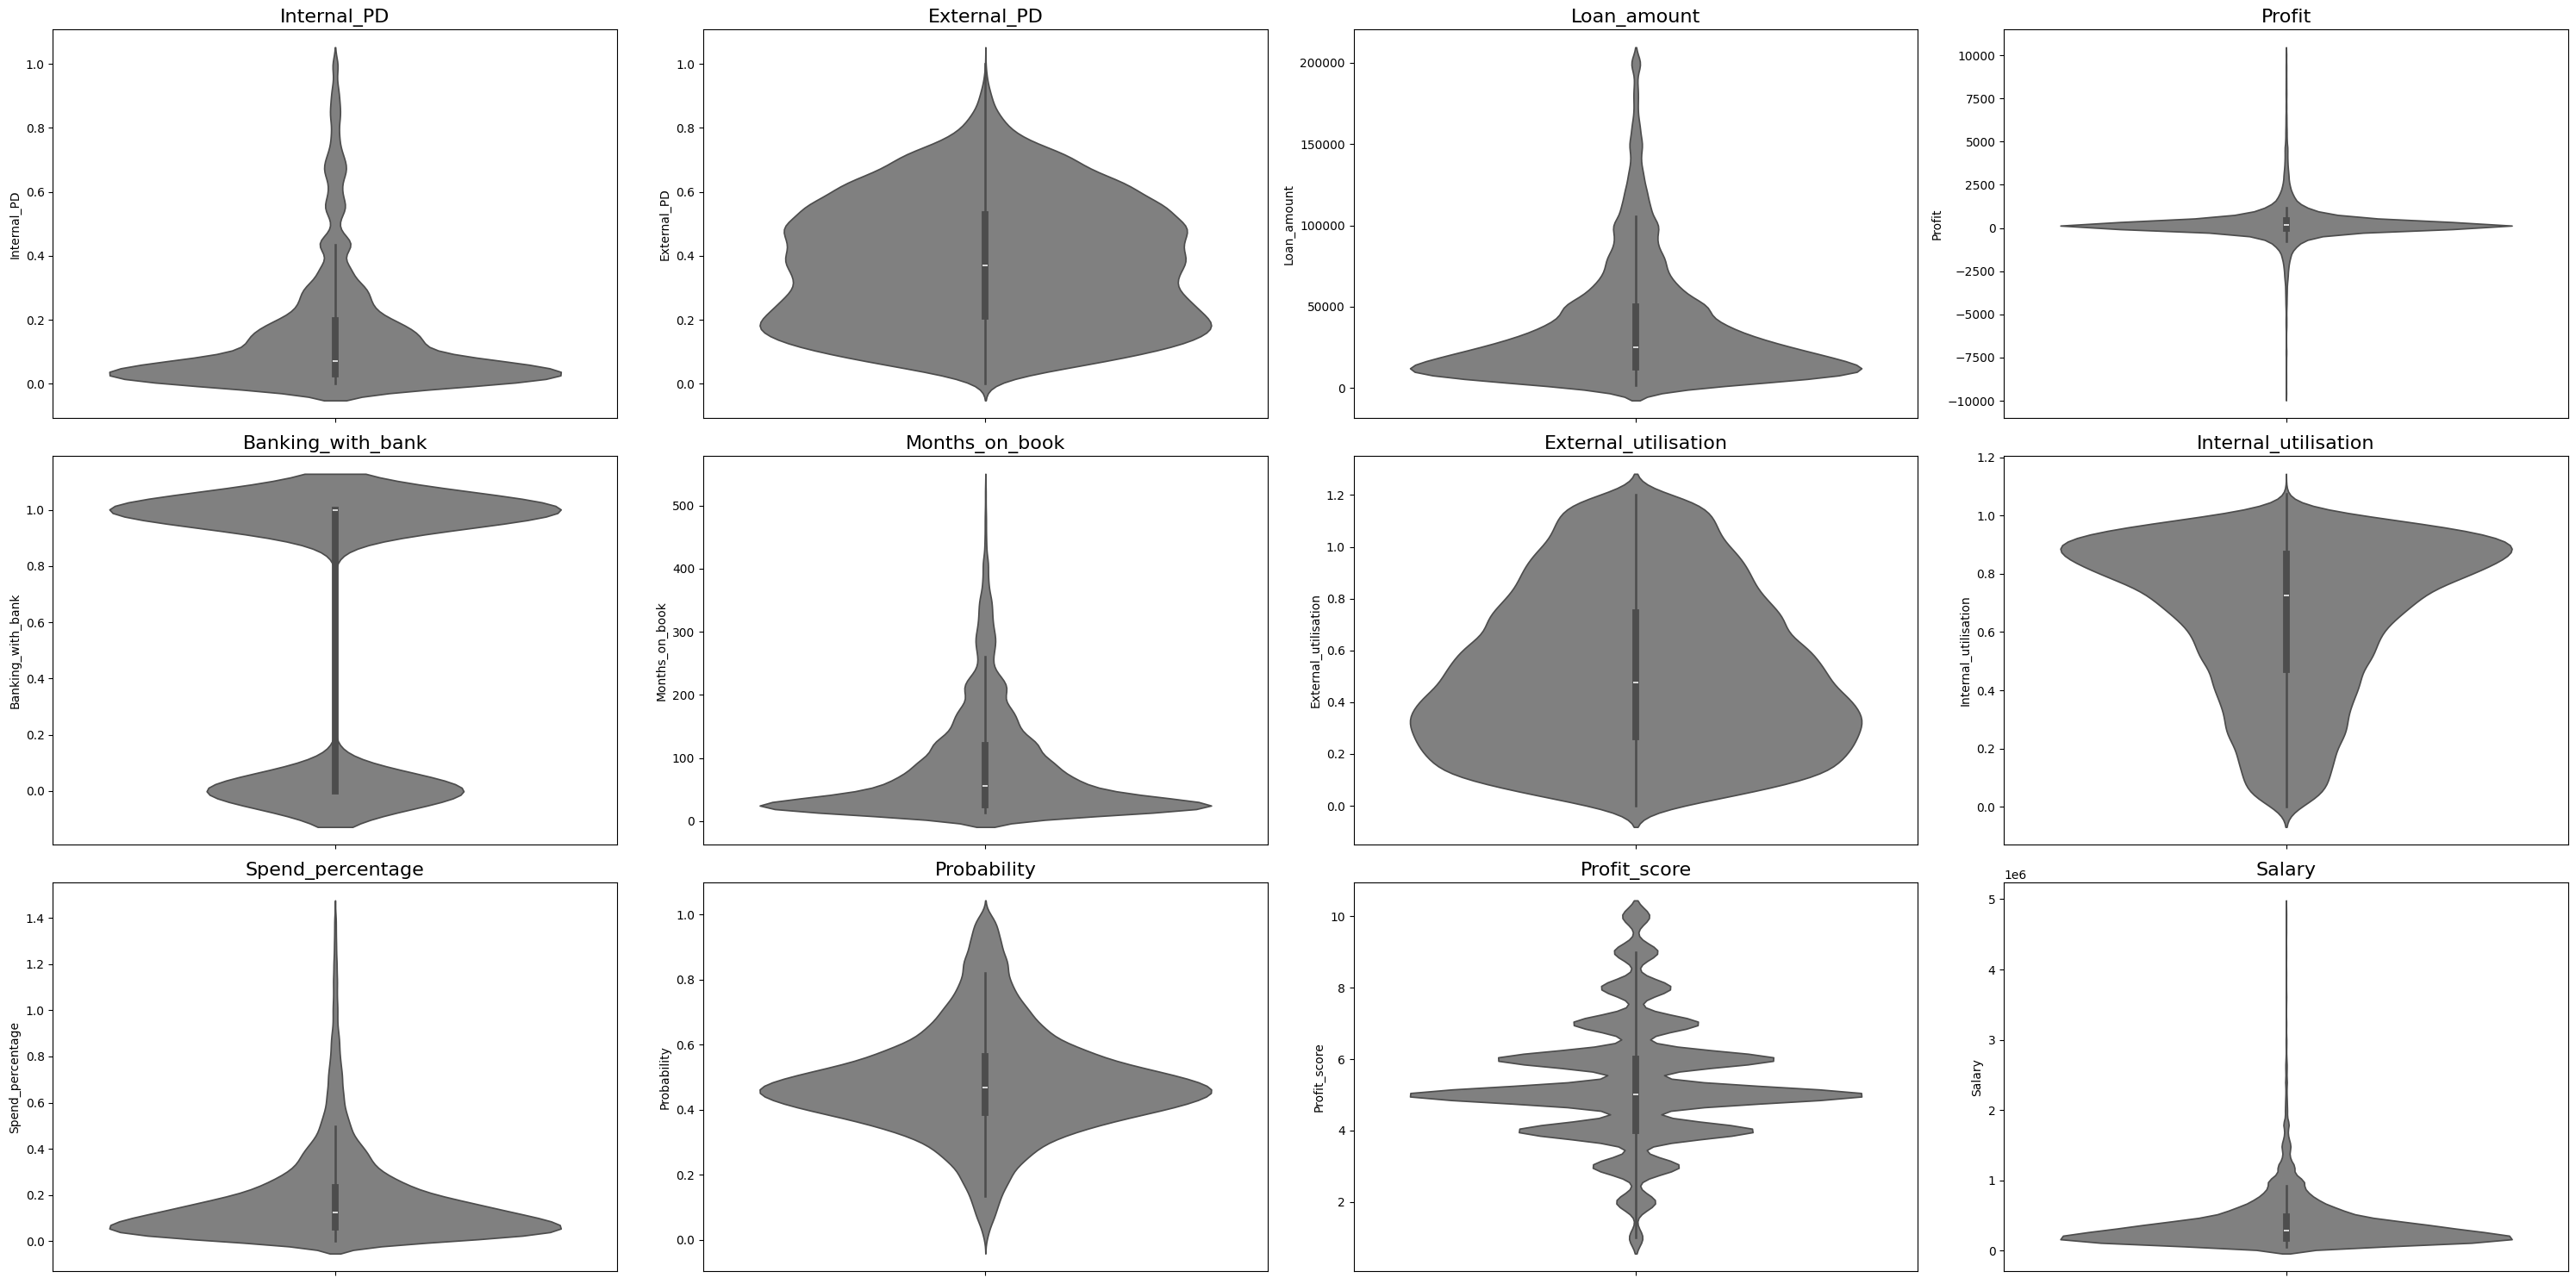

In [8]:
df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Id','Account_status'],axis = 1)
df_copy_2.head()

fig , axs = plt.subplots(3,4, figsize=(30,15),)
fig.subplots_adjust(hspace = 0.5, wspace = .2)
axs = axs.ravel()


for index,column in enumerate(df_copy_2.columns):
    axs[index-1].set_title((column), fontsize = 16)
    sns.violinplot(y=column, data = df_copy_2, color = 'gray', ax = axs[index-1])
    
fig.tight_layout()

**Remark**

* Salary, profit and internal and external PDs clearly have outliers from the violin plots. Lastly to get a third view of outliers, we will use z scores to get a sense of how many outliers exists 

In [9]:
total_len = len(df_copy)
total_len

23455

In [10]:
from scipy import stats

outliers = 0
for index, column in enumerate(df_copy_2.columns):
    outliers += len(df_copy[np.abs(stats.zscore(df_copy_2[column])) >= 3])
    print("{} has {} outliers which is {}% of the data".format(column,len(df_copy[np.abs(stats.zscore(df_copy_2[column])) >= 3]),np.round(len(df_copy[np.abs(stats.zscore(df_copy_2[column])) >= 3])/total_len,4)*100))

Salary has 421 outliers which is 1.79% of the data
Internal_PD has 627 outliers which is 2.67% of the data
External_PD has 2 outliers which is 0.01% of the data
Loan_amount has 514 outliers which is 2.19% of the data
Profit has 581 outliers which is 2.48% of the data
Banking_with_bank has 0 outliers which is 0.0% of the data
Months_on_book has 499 outliers which is 2.13% of the data
External_utilisation has 0 outliers which is 0.0% of the data
Internal_utilisation has 0 outliers which is 0.0% of the data
Spend_percentage has 581 outliers which is 2.48% of the data
Probability has 90 outliers which is 0.38% of the data
Profit_score has 0 outliers which is 0.0% of the data


There is obviously outliers and errors in the data, which could be skewing data. We thus remove the outliers.

In [11]:
from scipy import stats

outliers = 0
for index, column in enumerate(df_copy_2.columns):
    df_copy = df_copy[np.abs(stats.zscore(df_copy_2[column])) < 3]
    
print(f'removing outliers reduced the data by {round(1- len(df_copy)/total_len,4)*100}%')

removing outliers reduced the data by 12.57%


C:\Users\vuyis\AppData\Local\Temp\ipykernel_7028\1004757332.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[np.abs(stats.zscore(df_copy_2[column])) < 3]
C:\Users\vuyis\AppData\Local\Temp\ipykernel_7028\1004757332.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[np.abs(stats.zscore(df_copy_2[column])) < 3]
C:\Users\vuyis\AppData\Local\Temp\ipykernel_7028\1004757332.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[np.abs(stats.zscore(df_copy_2[column])) < 3]
C:\Users\vuyis\AppData\Local\Temp\ipykernel_7028\1004757332.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[np.abs(stats.zscore(df_copy_2[column])) < 3]
C:\Users\vuyis\AppData\Local\Temp\ipykernel_7028\1004757332.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[np.abs(sta

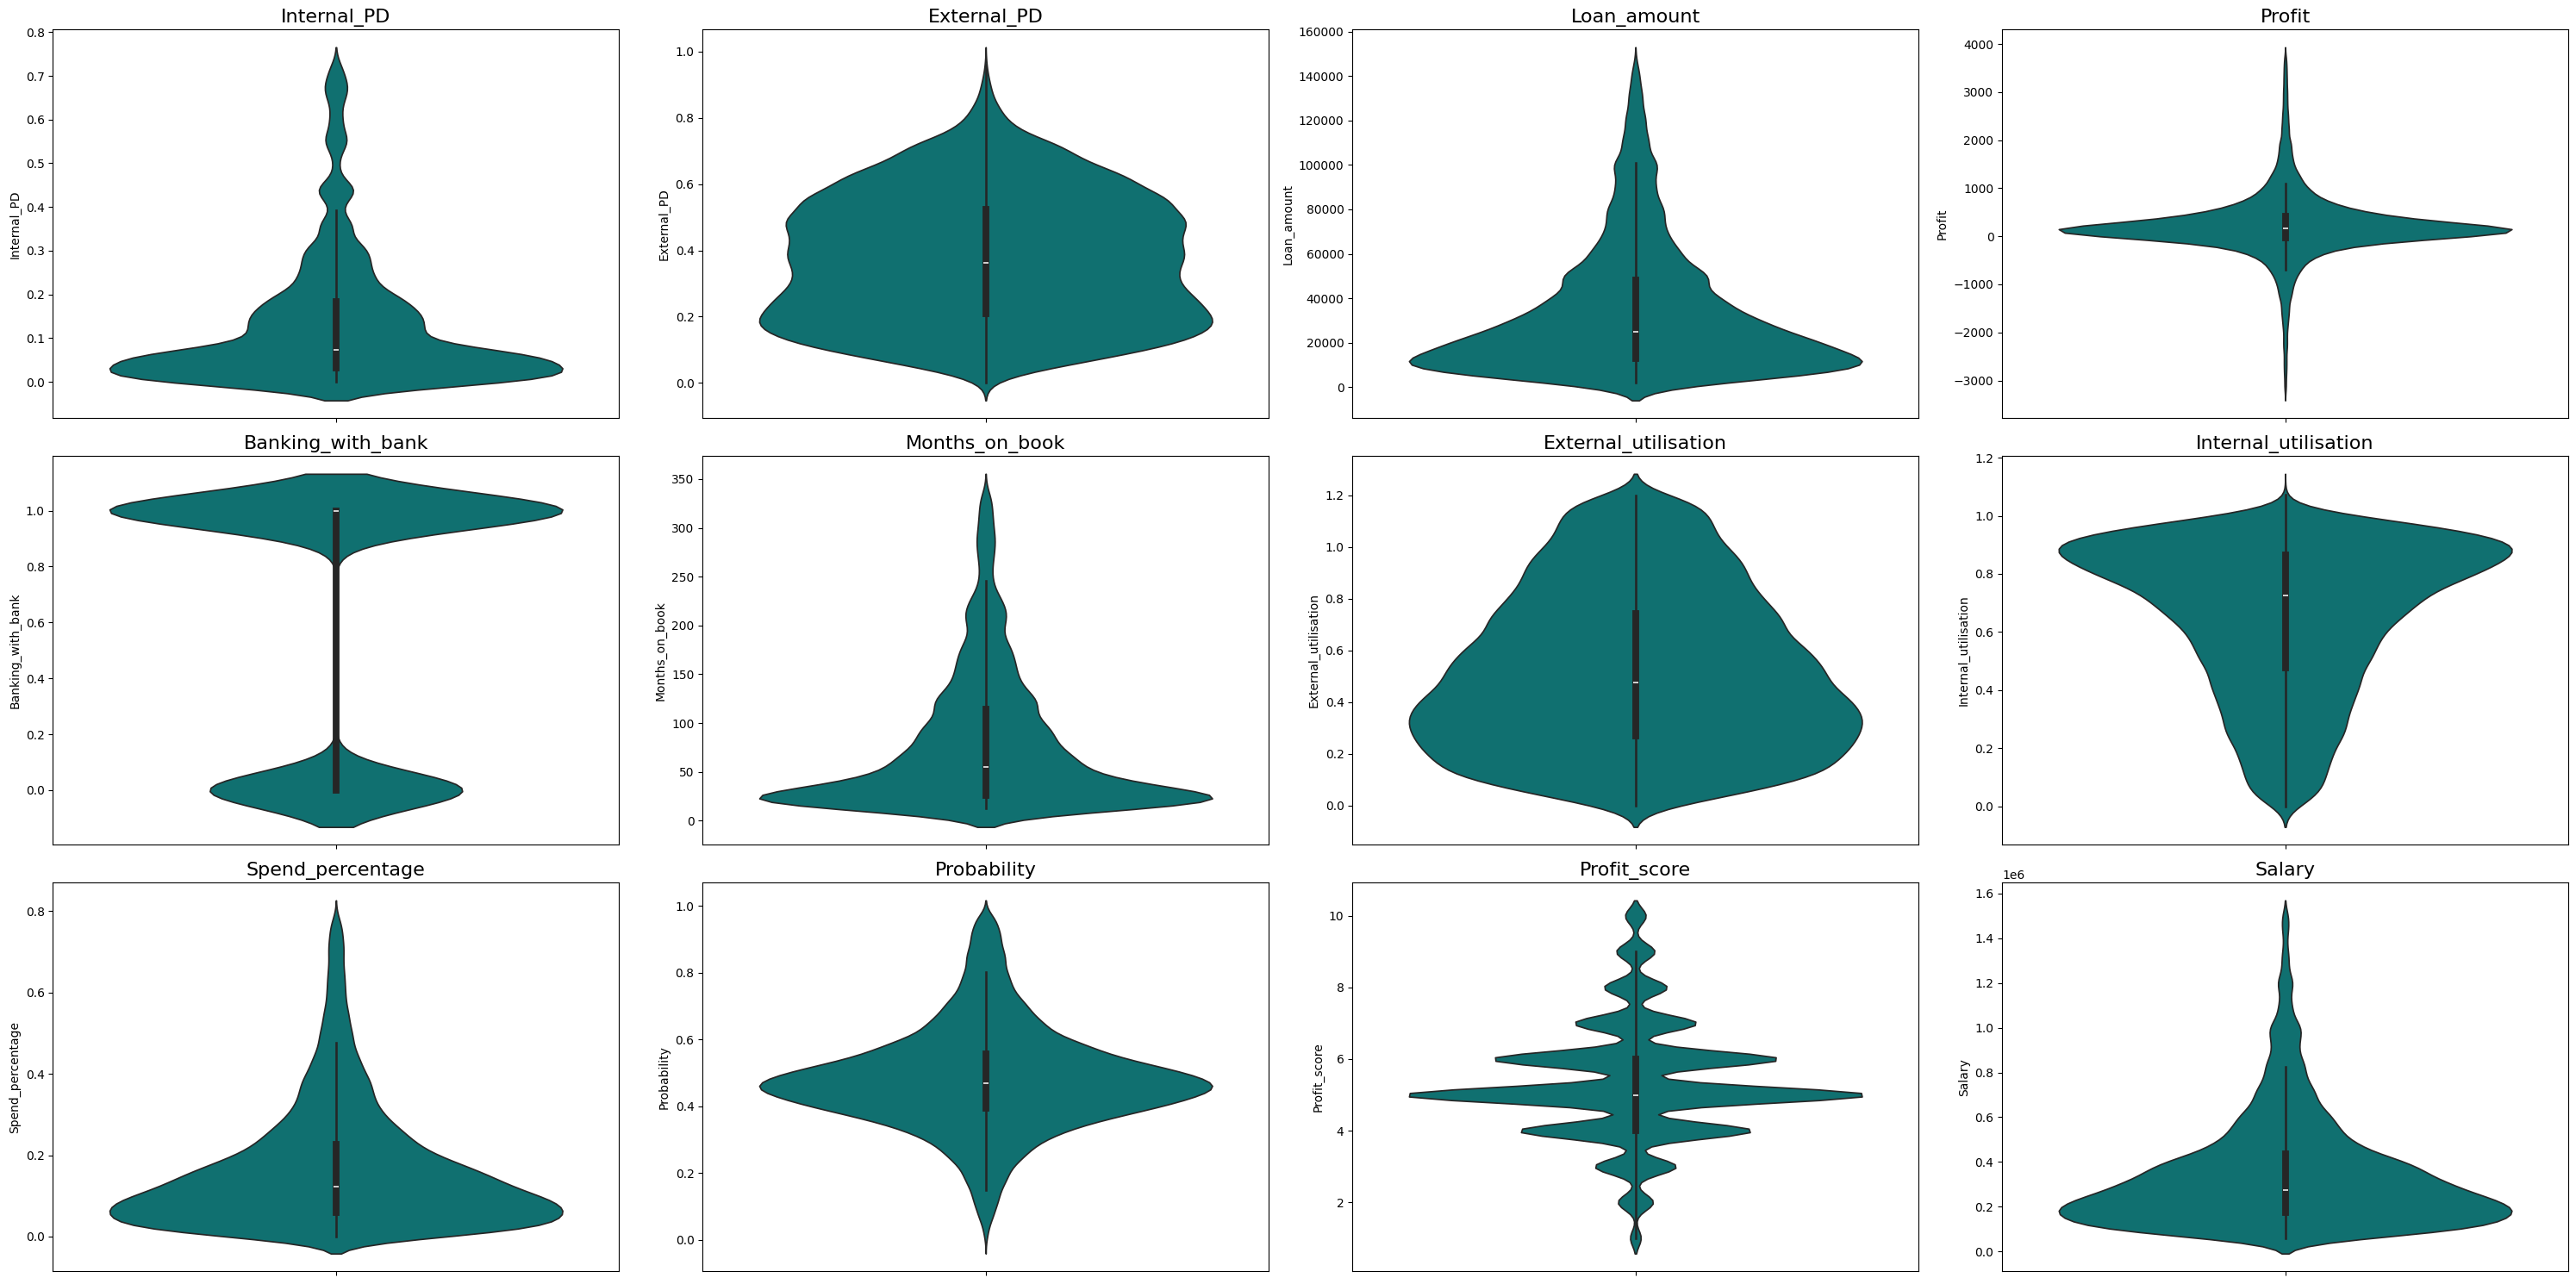

In [12]:
df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Id','Account_status'],axis = 1)
df_copy_2.head()

fig , axs = plt.subplots(3,4, figsize=(30,15),)
fig.subplots_adjust(hspace = 0.5, wspace = .2)
axs = axs.ravel()


for index,column in enumerate(df_copy_2.columns):
    axs[index-1].set_title((column), fontsize = 16)
    sns.violinplot(y=column, data = df_copy_2, color = 'teal', ax = axs[index-1])
    
fig.tight_layout()

This is a much better distribution of the variables

#### **Bucketing**

We can determine the profit scores by using both classification and regression models. However classification is more suitable for our purpose of determining segments that are profitable, as with regression we won't have the luxury of discretizing the continious features. To make this project exhaustive, ensuring we've covered all areas, we will use both regression and classification. For the purpose of classification we will add additional columns of continious variables discretized.

We will descretize:
1. Internal_PD
2. External_PD
3. Loan_amount
4. Months_on_book
5. External_utilisation
6. Internal_utilisation
7. Spend_percentage
8. Salary

We first evaluate the distribution to have a sense of what buckets to create / how to segment it, and later check that there is enough volume in each bucket.

In [13]:
def histogram(col):
    print(f" min = {np.min(col)} , max = {np.max(col)}")
    plt.hist(col, bins = 100, color = 'gray')
    plt.rcParams['figure.figsize'] = [6,2]
    plt.show()

In [14]:
def horizontal_bar(col):
    x = df_copy.groupby([col]).count().reset_index()[[col,'Id']]
    str_x = []
    for i in x[col]:
        str_x.append(str(i))
    plt.barh(str_x,x['Id']/np.sum(x['Id']),color = 'teal')

**Internal PD**

 min = 0.0 , max = 1.0


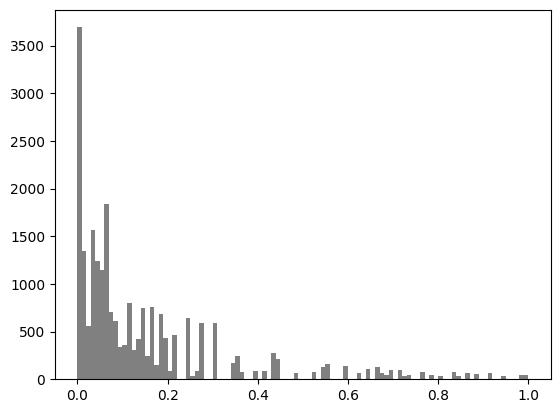

In [15]:
histogram(df.Internal_PD)

In [16]:
# Create initial buckets since applicant incomes are different and modify buckets until there's a somewhat appriopriate
#distribution between buckets 
df_copy['Internal_PD_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Internal_PD'] <= 0.01,
            df_copy['Internal_PD'].between(0.01, 0.03,inclusive='right'),
            df_copy['Internal_PD'].between(0.03, 0.04,inclusive='right'),
            df_copy['Internal_PD'].between(0.04, 0.07,inclusive='right'),
            df_copy['Internal_PD'].between(0.07, 0.10,inclusive='right'),
            df_copy['Internal_PD'].between(0.10, 0.15,inclusive='right'),
            df_copy['Internal_PD'].between(0.15, 0.25,inclusive='right'),
            df_copy['Internal_PD'] > 0.25
            
        ],
        [
            0.01,
            0.03,
            0.04,
            0.07,
            0.10,
            0.15,
            0.25,
            1
        ],
        default = -1
        )

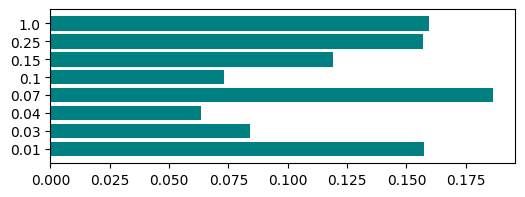

In [17]:
horizontal_bar('Internal_PD_band')

**External PD**

 min = 0.0 , max = 1.0


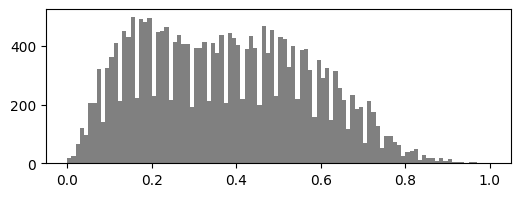

In [18]:
histogram(df.External_PD)

In [19]:
# Create initial buckets since applicant incomes are different and modify buckets until there's a somewhat appriopriate
#distribution between buckets 
df_copy['External_PD_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['External_PD'] <= 0.10,
            df_copy['External_PD'].between(0.10, 0.2,inclusive='right'),
            df_copy['External_PD'].between(0.2, 0.3,inclusive='right'),
            df_copy['External_PD'].between(0.3, 0.4,inclusive='right'),
            df_copy['External_PD'].between(0.4, 0.5,inclusive='right'),
            df_copy['External_PD'].between(0.5, 0.6,inclusive='right'),
            df_copy['External_PD'].between(0.6, 0.7,inclusive='right'),
            df_copy['External_PD'] > 0.7
            
        ],
        [
            0.1,
            0.2,
            0.3,
            0.4,
            0.5,
            0.6,
            0.7,
            1
        ],
        default = -1
        )

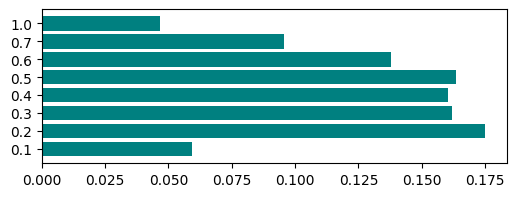

In [20]:
horizontal_bar('External_PD_band')

**Loan_amount**

 min = 2000.0 , max = 200000.0


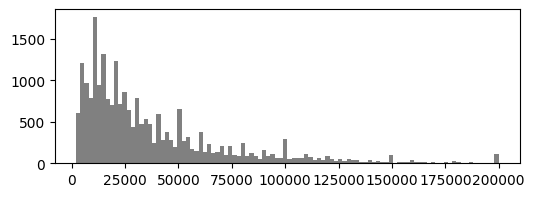

In [21]:
histogram(df.Loan_amount)

In [22]:
# Create initial buckets since applicant incomes are different and modify buckets until there's a somewhat appriopriate
#distribution between buckets 
df_copy['Loan_amount_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Loan_amount'] <= 10000,
            df_copy['Loan_amount'].between(10000, 20000,inclusive='right'),
            df_copy['Loan_amount'].between(20000, 40000,inclusive='right'),
            df_copy['Loan_amount'].between(40000, 75000,inclusive='right'),
            df_copy['Loan_amount'].between(75000, 200000,inclusive='right')
            
        ],
        [
            10000,
            20000,
            40000,
            75000,
            200000
        ],
        default = -1
        )

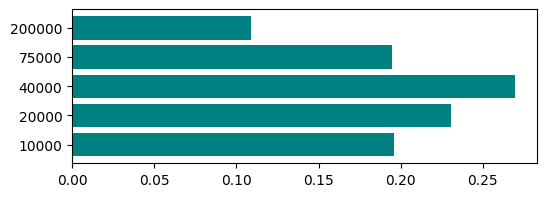

In [23]:
horizontal_bar('Loan_amount_band')

 min = 13.0 , max = 528.0


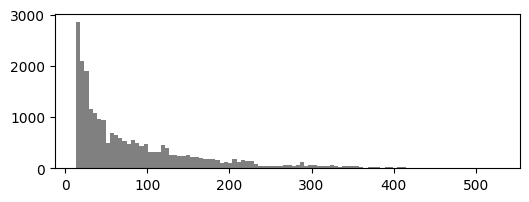

In [24]:
histogram(df.Months_on_book)


In [25]:
# Create initial buckets since applicant incomes are different and modify buckets until there's a somewhat appriopriate
#distribution between buckets 
df_copy['Months_on_book_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Months_on_book'] <= 24,
            df_copy['Months_on_book'].between(24, 60,inclusive='right'),
            df_copy['Months_on_book'].between(60, 120,inclusive='right'),
            df_copy['Months_on_book'].between(120, 180,inclusive='right'),
            df_copy['Loan_amount'] > 180
            
        ],
        [
            24,
            60,
            120,
            180,
            600
        ],
        default = -1
        )

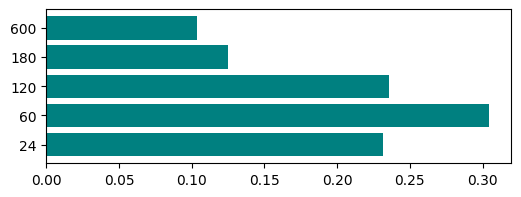

In [26]:
horizontal_bar('Months_on_book_band')

 min = 3.755364806866953e-05 , max = 1.199986839219127


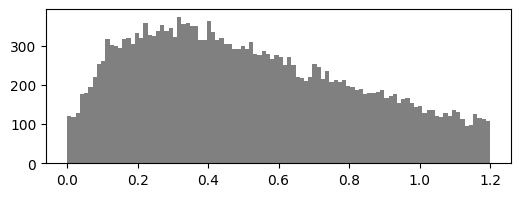

In [27]:
histogram(df.External_utilisation)


In [28]:
# Create initial buckets since applicant incomes are different and modify buckets until there's a somewhat appriopriate
#distribution between buckets 
df_copy['External_utilisation_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['External_utilisation'] <= 0.2,
            df_copy['External_utilisation'].between(0.2, 0.4,inclusive='right'),
            df_copy['External_utilisation'].between(0.4, 0.6,inclusive='right'),
            df_copy['External_utilisation'].between(0.6, 0.8,inclusive='right'),
            df_copy['External_utilisation'].between(0.8, 1,inclusive='right'),
            df_copy['External_utilisation'].between(1, 1.5,inclusive='right'),
            df_copy['Loan_amount'] > 1.5
            
        ],
        [
            0.2,
            0.4,
            0.6,
            0.8,
            1,
            1.5,
            2
        ],
        default = -1
        )

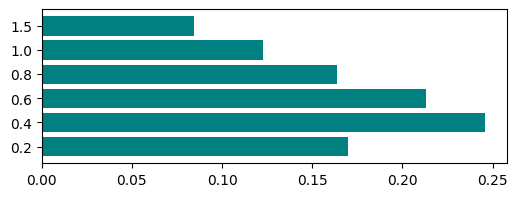

In [29]:
horizontal_bar('External_utilisation_band')

 min = 0.000287 , max = 1.073706


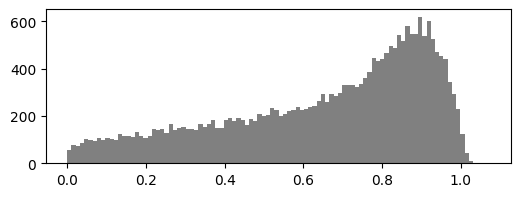

In [30]:
histogram(df.Internal_utilisation)


In [31]:
#distribution between buckets 
df_copy['Internal_utilisation_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Internal_utilisation'] <= 0.2,
            df_copy['Internal_utilisation'].between(0.2, 0.4,inclusive='right'),
            df_copy['Internal_utilisation'].between(0.4, 0.6,inclusive='right'),
            df_copy['Internal_utilisation'].between(0.6, 0.8,inclusive='right'),
            df_copy['Internal_utilisation'].between(0.8, 0.9,inclusive='right'),
            df_copy['Loan_amount'] > 0.9
            
        ],
        [
            0.2,
            0.4,
            0.6,
            0.8,
            0.9,
            2
        ],
        default = -1
        )

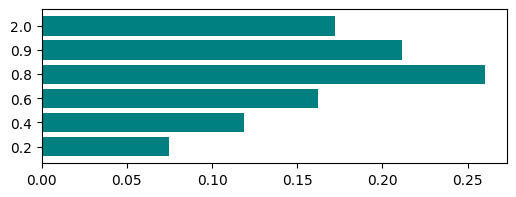

In [32]:
horizontal_bar('Internal_utilisation_band')

 min = 0.0 , max = 1.422559


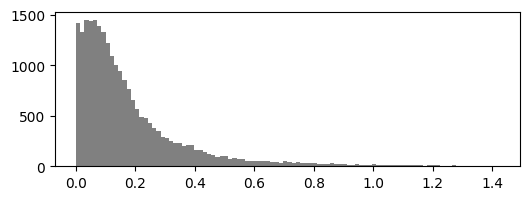

In [33]:
histogram(df.Spend_percentage)

In [34]:
#distribution between buckets 
df_copy['Spend_percentage_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Spend_percentage'] <= 0.05,
            df_copy['Spend_percentage'].between(0.05, 0.1,inclusive='right'),
            df_copy['Spend_percentage'].between(0.1, 0.2,inclusive='right'),
            df_copy['Spend_percentage'].between(0.2, 0.5,inclusive='right'),
            df_copy['Spend_percentage'] > 0.5
            
        ],
        [
            0.05,
            0.1,
            0.2,
            0.5,
            2
        ],
        default = -1
        )

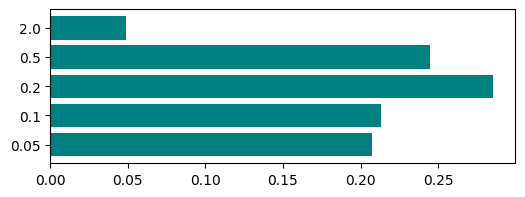

In [35]:
horizontal_bar('Spend_percentage_band')

 min = 60000.0 , max = 4884000.0


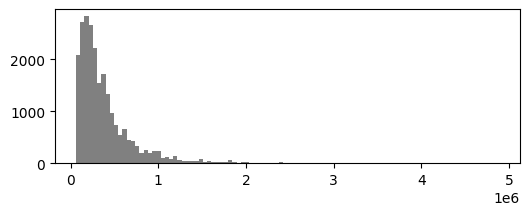

In [36]:
histogram(df.Salary)

In [37]:
#distribution between buckets 
df_copy['Salary_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Salary'] <= 120000,
            df_copy['Salary'].between(120000, 180000,inclusive='right'),
            df_copy['Salary'].between(180000, 240000,inclusive='right'),
            df_copy['Salary'].between(240000, 360000,inclusive='right'),
            df_copy['Salary'].between(360000, 600000,inclusive='right'),
            df_copy['Salary'] > 600000
            
        ],
        [
            120000,
            180000,
            240000,
            360000,
            600000,
            1000000
        ],
        default = -1
        )

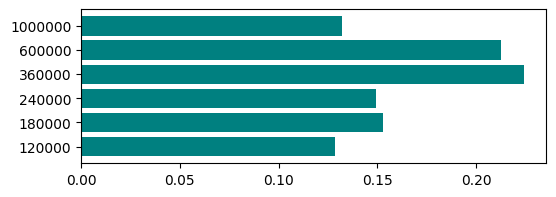

In [38]:
horizontal_bar('Salary_band')

In [39]:
import os 
path_all = os.getcwd()
df_copy.to_csv(path_all + '/data_band.csv')

---
<a id = "five" ></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** This section is divided into two parts: 1) Data visualization, which can be found in the powerbi dashboard [here](https://app.powerbi.com/groups/me/reports/442ae843-7963-4a78-a942-023e1c6e6f03/5bfcac1093ef468c19e8?redirectedFromSignup=1&experience=power-bi). PowerBI enables more dynamic and interactive views. 2) Correlation analysis, in the notebook, we focus more on the correlation analysis part.
---


#### **Data visualization**

[PowerBI dashboard](https://app.powerbi.com/groups/me/reports/442ae843-7963-4a78-a942-023e1c6e6f03/5bfcac1093ef468c19e8?redirectedFromSignup=1&experience=power-bi) for data visualization views.

#### **Correlation analysis**

[]

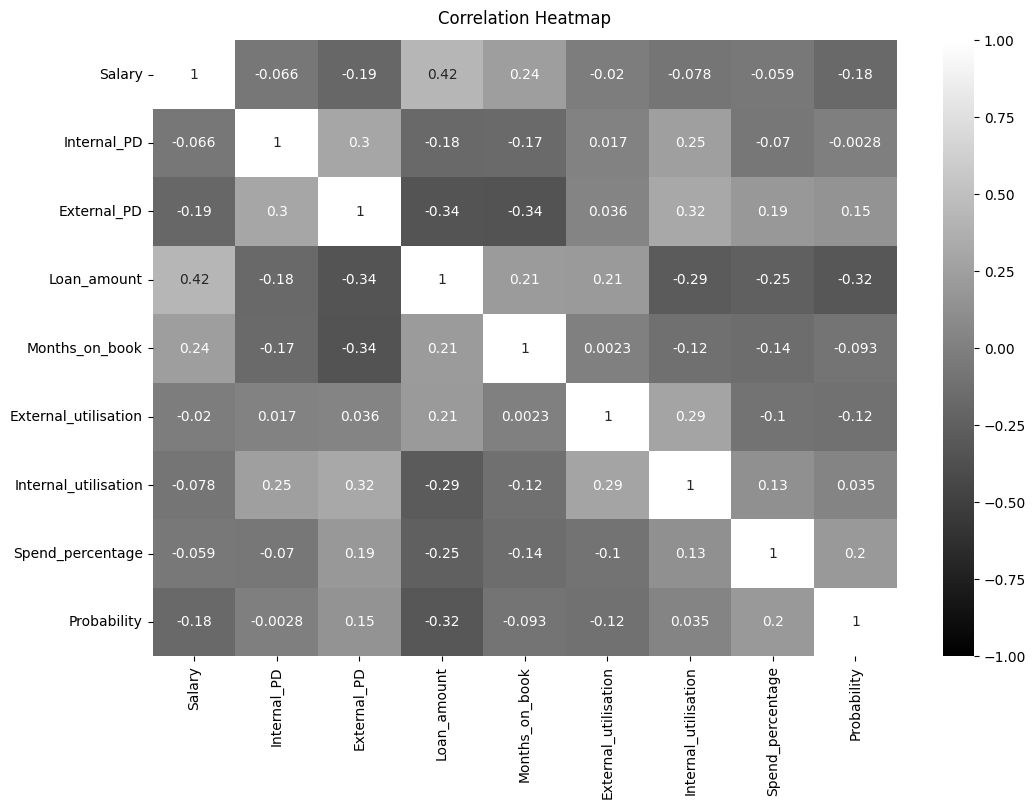

In [40]:
plt.rcParams['figure.figsize'] = (12, 8)
df_copy_2 = df_copy_2.drop(['Profit_score','Profit','Banking_with_bank'],axis = 1)
heatmap = sns.heatmap(df_copy_2.corr(),vmin=-1, vmax=1, cmap = "gray" ,annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.plot()

#remove profit and profit score and banking with bank

**Remark**

* The weak multicollinearities creeping up in the data, however all corelations are below 50% even with the response variable i.e. the probability of prfoitability
* The strongest weak correlation with profitability likelihood is the loan amount, followed by salary and external utilisation, all in the opposite direction
*  Let's see a more comprehensive visual of the relationships in the form of pairplots.

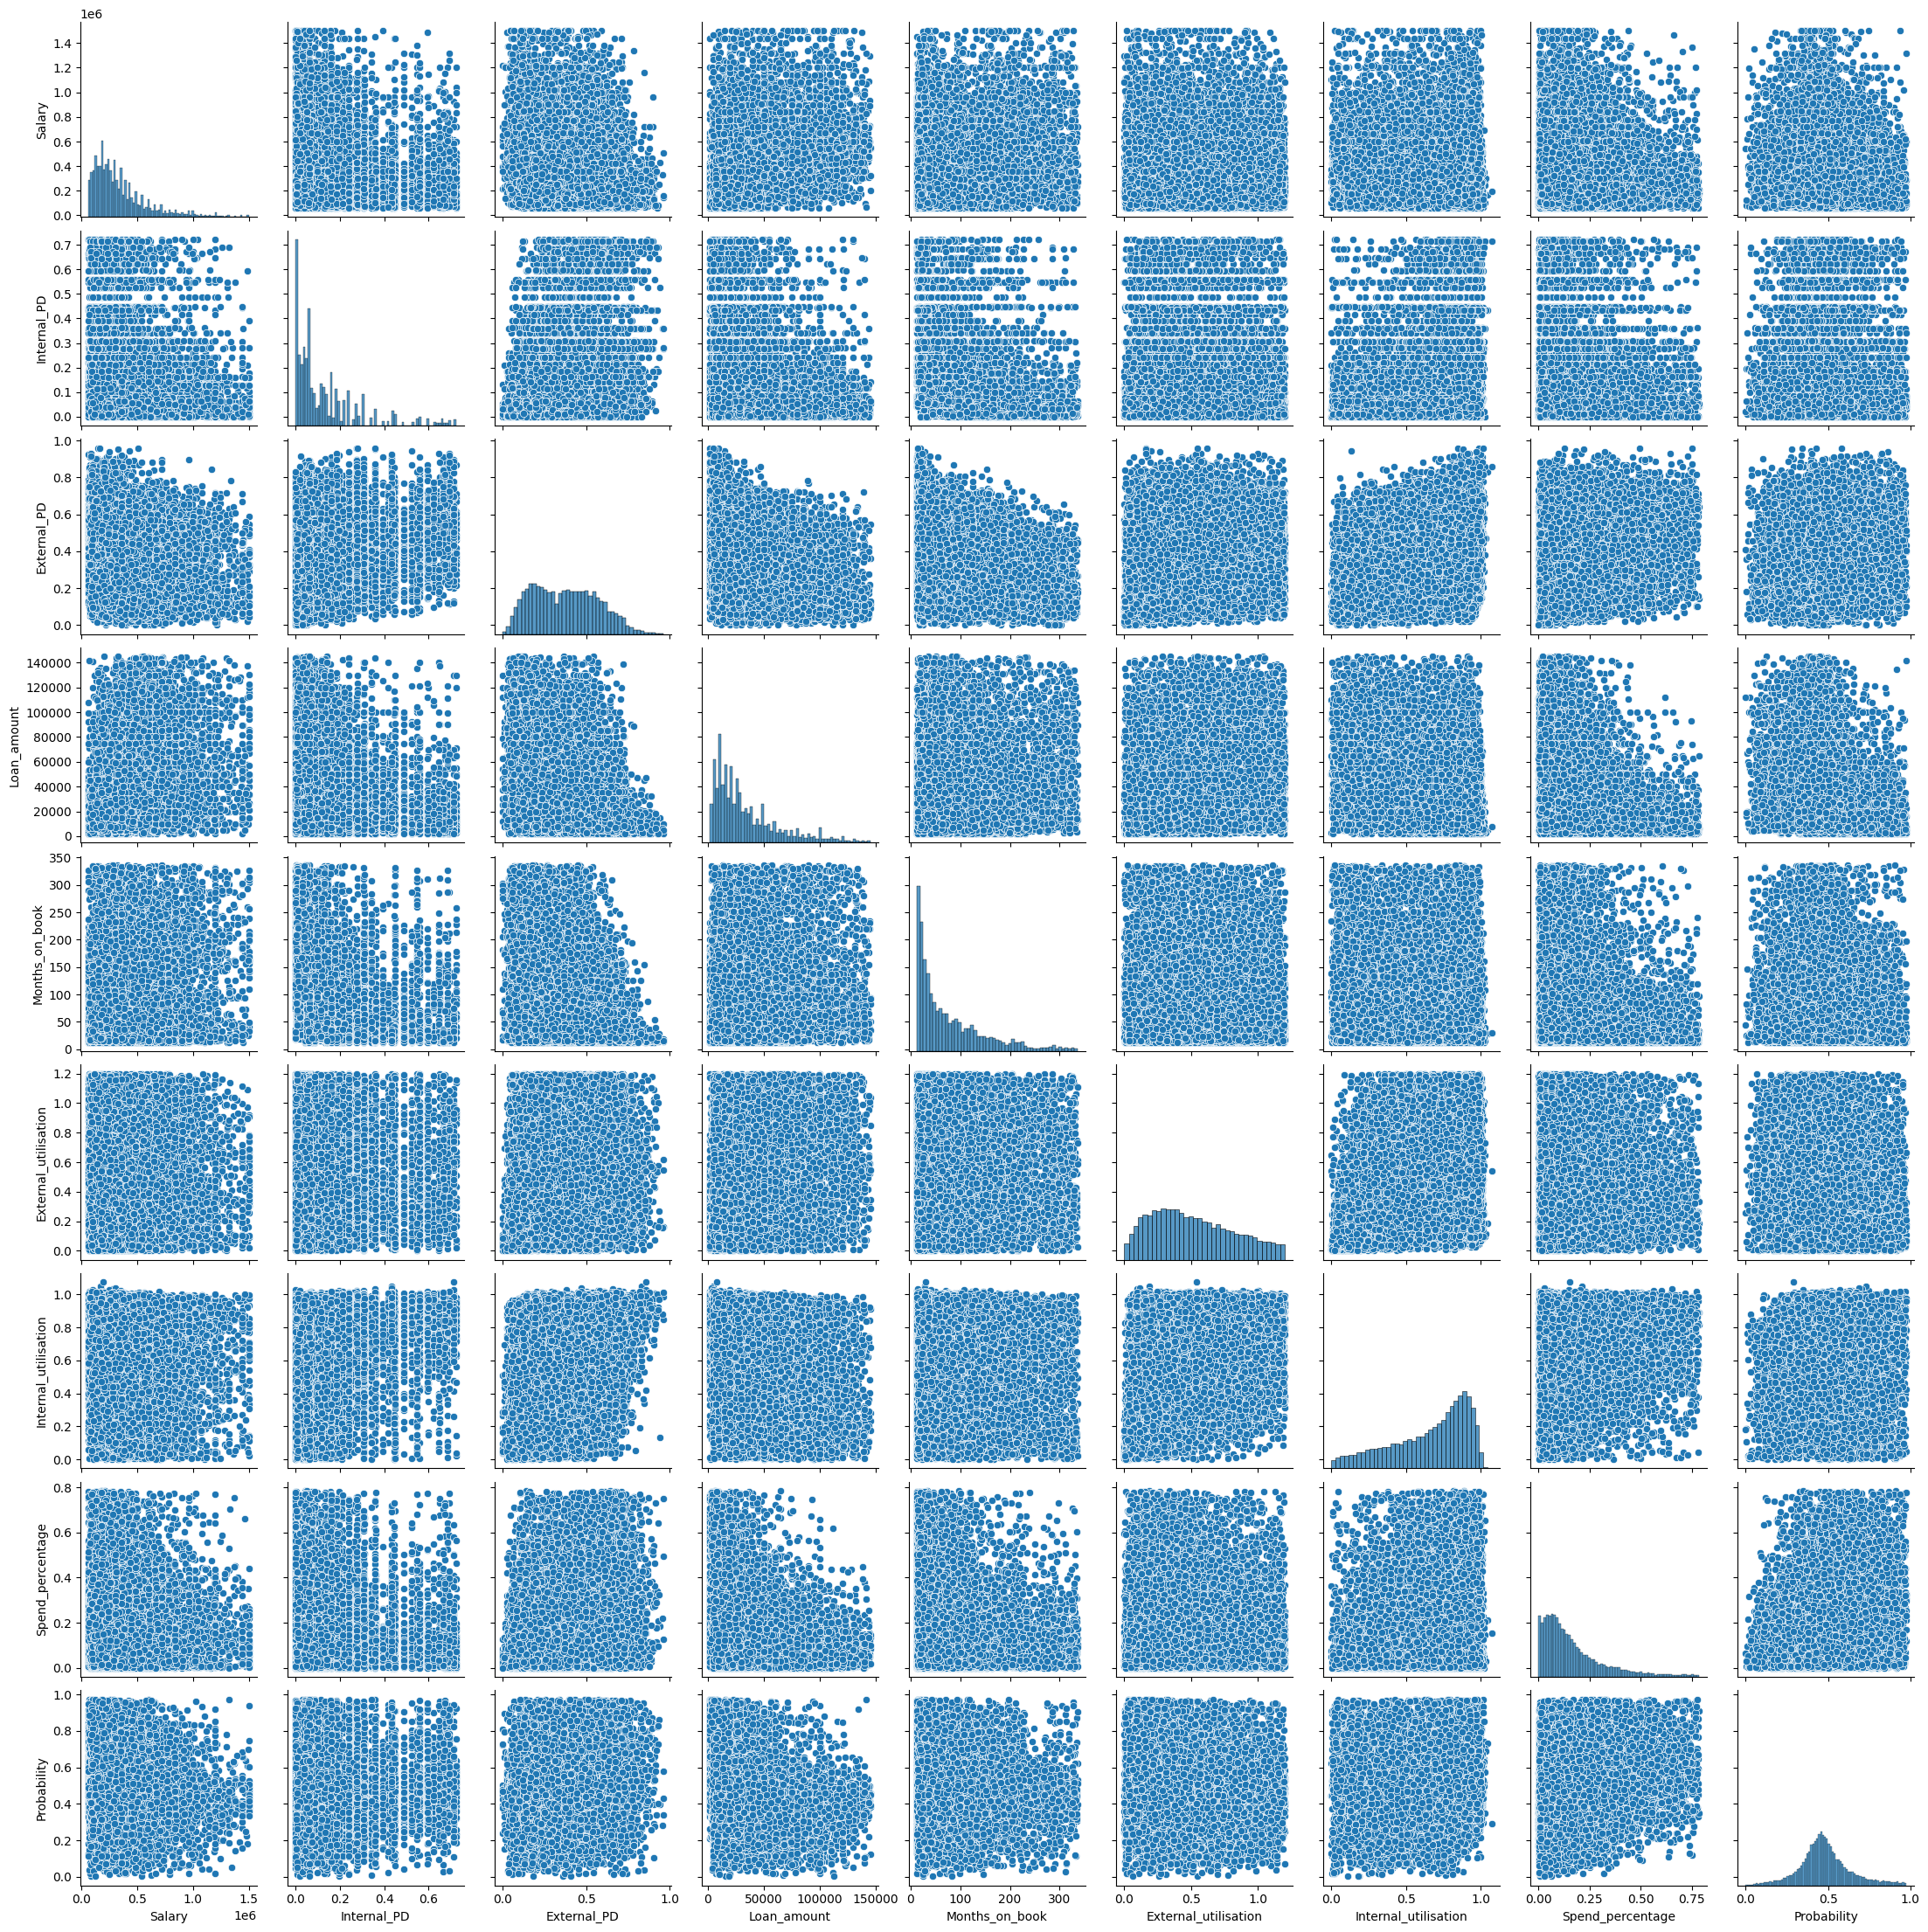

In [41]:
sns.pairplot(df_copy_2)

#### **Correlation with response variable**

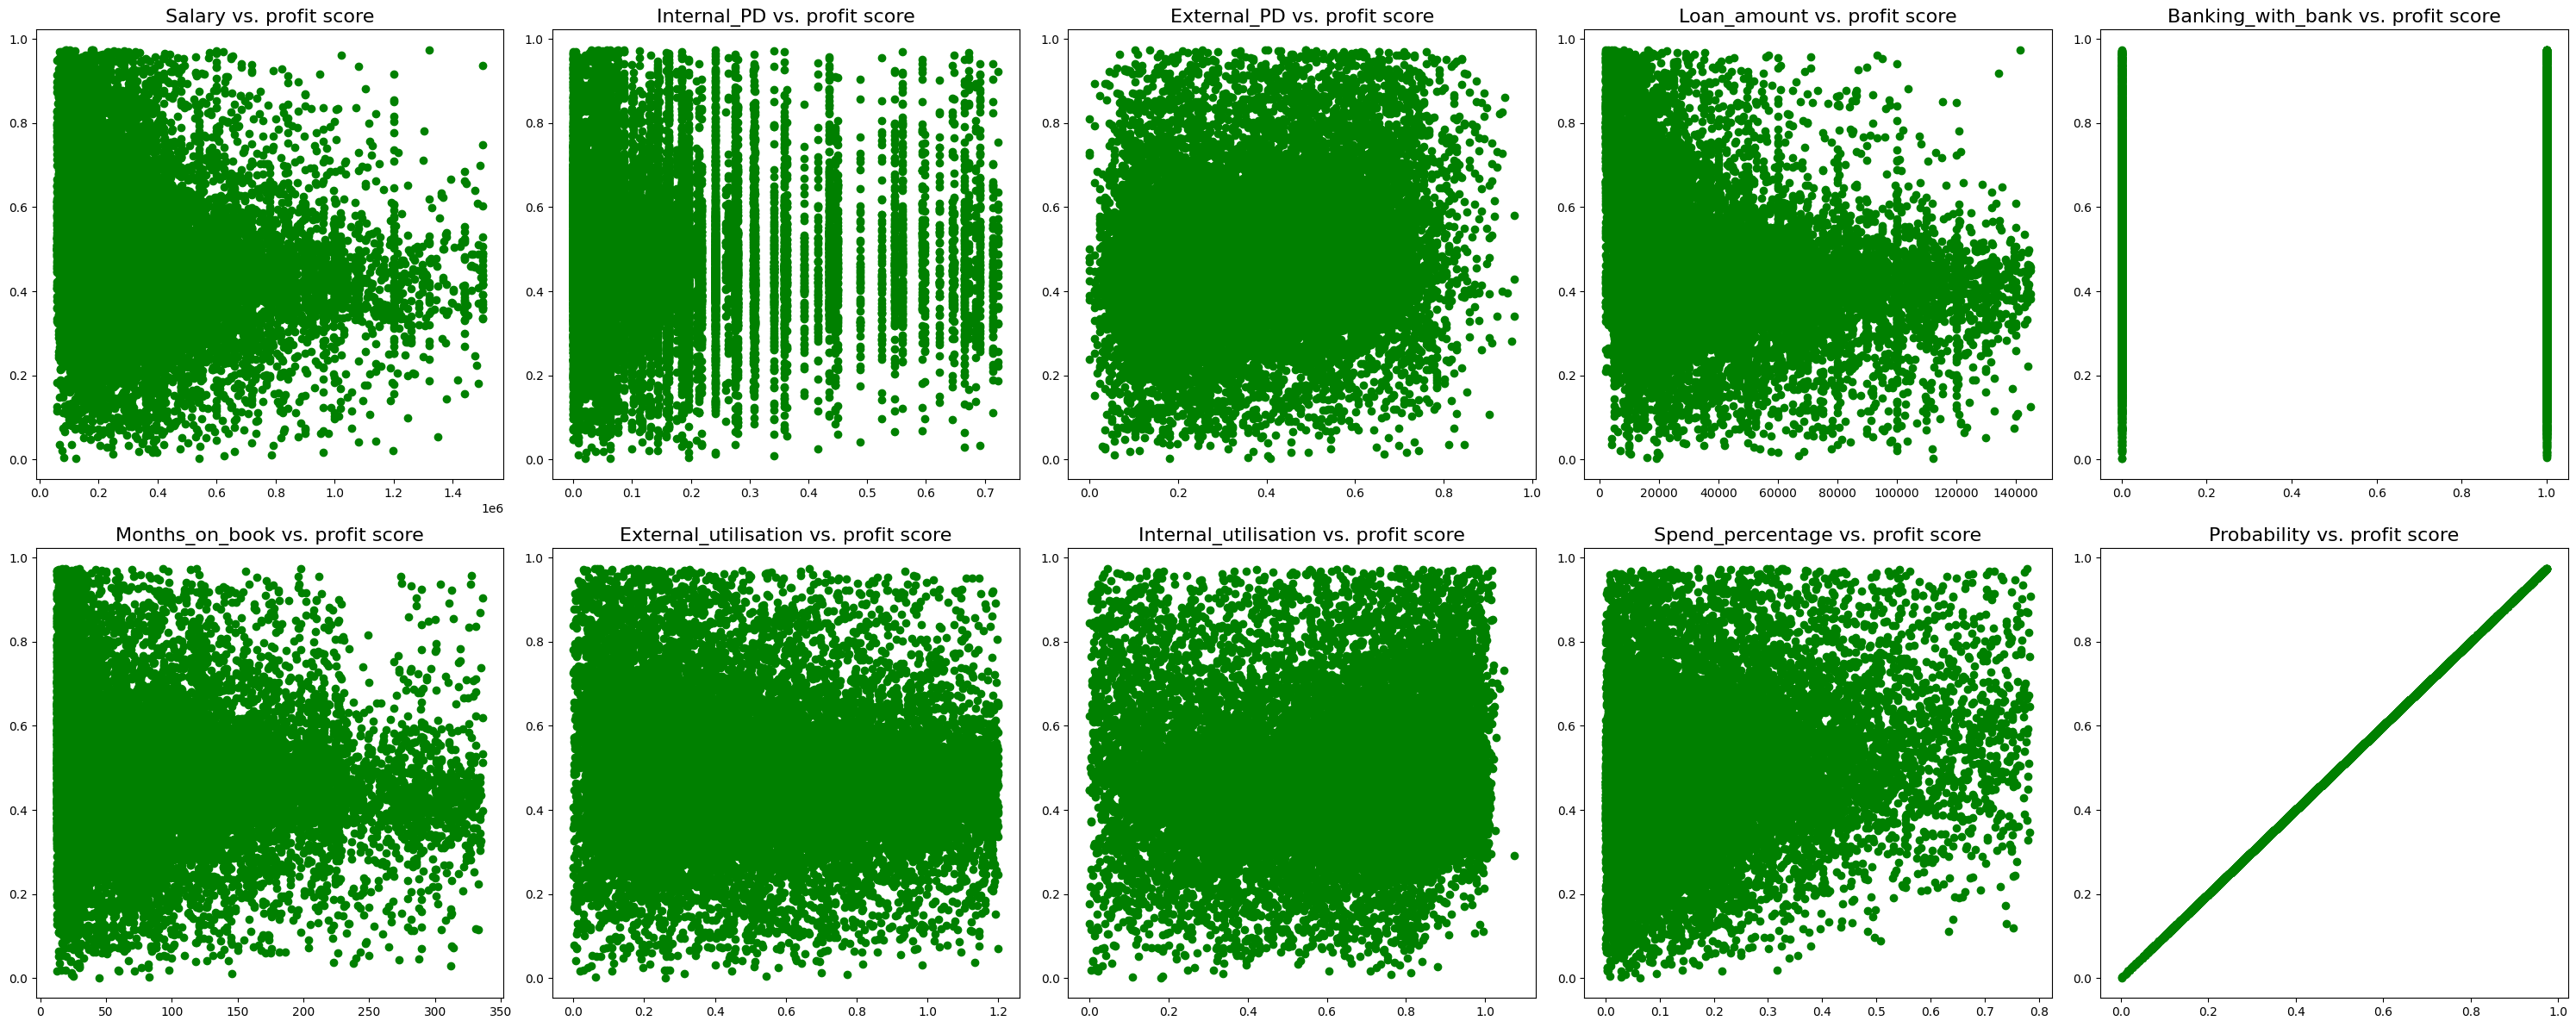

In [43]:
fig , axs = plt.subplots(2,5, figsize=(30,12),)
fig.subplots_adjust(hspace = 0.5, wspace = .2)
#axs = axs.ravel()

x = [0,0,0,0,0,1,1,1,1,1]
y = [0,1,2,3,4,0,1,2,3,4]
df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Id','Account_status'],axis = 1)

corrs = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
       'Months_on_book', 'External_utilisation',
       'Internal_utilisation', 'Spend_percentage', 
                 'Probability']]

for index, column in enumerate(corrs.columns):
    axs[x[index],y[index]].set_title("{} vs. profit score".format(column), fontsize=16)
    axs[x[index],y[index]].scatter(x=df_copy_2[column],y=df_copy['Probability'], color = 'g')
    
fig.tight_layout(pad=1)

**Remark**

* There isn't a clear linear relation between the predictor variable and response variable.
* However, we can see some sort of relation between spend percentage and profit score,  high spend percentage are likely to lead to high profit scores.
* The patterns with others seem somewhat non linear for instance salary, loan amount and months on books vs profit score.

In [44]:
corrs = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
       'Months_on_book', 'External_utilisation',
       'Internal_utilisation', 'Spend_percentage', 
                 'Probability']].corr()['Probability'].sort_values(ascending=False)

dict_cp = {}

column_titles = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
       'Months_on_book', 'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]

for col in column_titles:
    p_val = round(pearsonr(df_copy[col],df_copy['Probability'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_value')
df_cp_sorted[df_cp_sorted['P_value']<0.1]

Correlation_Coefficient   P_value
Salary                              -0.177805  0.000000
External_PD                          0.152720  0.000000
Loan_amount                         -0.315894  0.000000
Banking_with_bank                   -0.081612  0.000000
External_utilisation                -0.116985  0.000000
Months_on_book                      -0.092799  0.000000
Spend_percentage                     0.199839  0.000000
Internal_utilisation                 0.034980  0.000001

---

## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


#### **Regression models**

Normalize the data and split it into test and train sets. We use the probability of profitability as the response variable.

In [45]:
#Include product (first convert to numeric)
X = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
        'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]

#y = df_copy[['Probability','Profit_score']]
y = df_copy[['Probability']]

#y_train = y_train[['Probability']]
#y_profit_score =  y_test[['Profit_score']]
#y_test = y_test[['Probability']]


x_scaler = StandardScaler()
#y_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(X)
#y_scaled = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42)


Test various regression models using grid search and cross validation and choose the best model of each regression algorithm.

In [46]:
%%time

#NN = KerasClassifier(build_fn=create_model, verbose=0)


# Define models and hyperparameters
models = {
    'Linear regression': LinearRegression(),
    'Ridge': Ridge(),
    #'Lasso': Lasso(),
    'Decision tree' : DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector' : SVR()
    ##'Neural Network': NN
    
}

param_grid = {
    'Linear regression': {},
    'Ridge': {'alpha': [0.1, 1, 10]},
    #'Lasso': {'alpha': [0.1, 1, 10]},
    'Decision tree': {'max_depth': [None, 10, 20, 30]
                     },
    'Random Forest': {'n_estimators': [50,100,200],
                     'max_depth': [5,10,20,30]},
    'Support Vector': { #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                       'C': [0.01, 0.1, 1],
                       'epsilon': [0.01, 0.1] }
   # 'Neural Network': { 'batch_size': [10, 20, 40], 
    #                   'epochs': [10, 50, 100], 
                       #'optimizer': ['SGD', 'Adam'], 
                      # 'init': ['uniform', 'normal'] 
                     # }
    
    
}

y_train = np.array(y_train).ravel()

# Perform Grid Search
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], n_jobs = 1, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train.ravel())
    best_models[name] = grid_search.best_estimator_

    print(best_models)
# Evaluate the best model
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    #mse = mean_squared_error(y_test, y_pred)
    test_mse = round(mean_squared_error(y_test, y_pred), 4)
    test_r2 = round(r2_score(y_test, y_pred), 4)
    
    y_pred = model.predict(X_train)
    train_mse = round(mean_squared_error(y_pred, y_train), 4)
    train_r2 = round(r2_score(y_pred, y_train), 4)
    
#Add progress bar

{'Linear regression': LinearRegression()}
{'Linear regression': LinearRegression(), 'Ridge': Ridge(alpha=10)}
{'Linear regression': LinearRegression(), 'Ridge': Ridge(alpha=10), 'Decision tree': DecisionTreeRegressor(max_depth=10)}
{'Linear regression': LinearRegression(), 'Ridge': Ridge(alpha=10), 'Decision tree': DecisionTreeRegressor(max_depth=10), 'Random Forest': RandomForestRegressor(max_depth=10, n_estimators=200)}
{'Linear regression': LinearRegression(), 'Ridge': Ridge(alpha=10), 'Decision tree': DecisionTreeRegressor(max_depth=10), 'Random Forest': RandomForestRegressor(max_depth=10, n_estimators=200), 'Support Vector': SVR(C=0.1)}
CPU times: total: 2min 59s
Wall time: 8min 51s


Plot evelaution metrics for each method

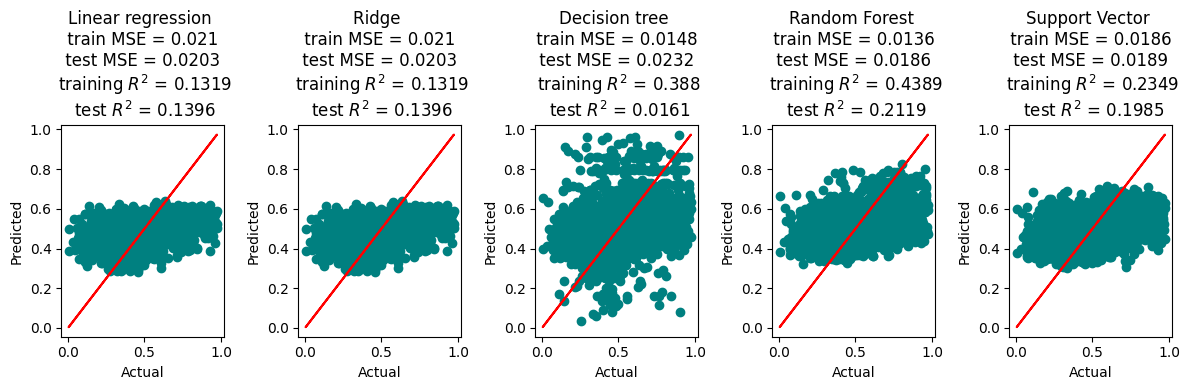

In [47]:
fig, ax = plt.subplots(1,5, figsize=(12,4))

i = 0 


#y_test = y_scaler.inverse_transform(y_test)
#y_train = y_scaler.inverse_transform(y_train)
results = []
for name, model in best_models.items():
    test_pred = model.predict(X_test)
    #test_pred = y_scaler.inverse_transform(test_pred.reshape(-1,1))
    #mse = mean_squared_error(y_test, y_pred)
    test_mse = round(mean_squared_error(y_test, test_pred), 4)
    test_r2 = round(r2_score(y_test, test_pred), 4)
    
    train_pred = model.predict(X_train)
    #train_pred = y_scaler.inverse_transform(train_pred.reshape(-1,1))
    train_mse = round(mean_squared_error(train_pred, y_train), 4)
    train_r2 = round(r2_score(y_train,train_pred), 4)
    
    #print(f"{name} Test MSE: {mse}")
    #print(f"{name} R squared: {metrics.r2_score(y_test,y_pred)}")

        # Calculate evaluation metrics
    #accuracy  = metrics.accuracy_score(y_train, train_pred)
    #precision = metrics.precision_score(y_train, train_pred)
    #recall    = metrics.recall_score(y_train, train_pred)
    
    #f1        = metrics.f1_score(y_train, train_pred)    
    #f1_test   = metrics.f1_score(y_test, test_pred)    
    
    # Save the results to dictionaries
    #models[name] = clf    
    # Append results to the list
    results.append([name, train_r2, test_r2, train_mse, test_mse])
    
    title_str = f"{name} \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, color ='red')
    ax[i].scatter(y_test, test_pred, color ='teal')
    i = i+1

fig.tight_layout()

results = pd.DataFrame(results, columns=['Regressor', f"$R^{2}$ Train", f"$R^{2}$ Test", 'MSE Train', "MSE Test"])
results.set_index('Regressor', inplace= True)

#Add progress bar

#### **Classification models**

Normalize the data and split it into test and train sets. We use the profit score classes as the response variable.

In [48]:
#Include product (first convert to numeric)
X = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
        'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]


#y = df_copy[['Probability','Profit_score']]
y = df_copy[['Profit_score']]

#y_train = y_train[['Probability']]
#y_profit_score =  y_test[['Profit_score']]
#y_test = y_test[['Probability']]


x_scaler = StandardScaler()
#y_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(X)
#y_scaled = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42)

Test various classification models using grid search and cross validation and choose the best model from each classification algorithm.

In [49]:
%%time
#NN = KerasClassifier(build_fn=create_model, verbose=0)


# Define models and hyperparameters
models = {
    'Log regression': LogisticRegression(),
    'Nearest Neighbour':  KNeighborsClassifier(),
    #'Lasso': Lasso(),
    'Decision tree' : DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector' : SVC()
    ##'Neural Network': NN
    
}

param_grid = {
    'Log regression': {'C': [0.1, 1, 10,100]} ,
    'Nearest Neighbour': {'n_neighbors': [3,5,7,10],
              #'weights': ['uniform', 'distance'], 
              'p': [1, 2]},
    #'Lasso': {'alpha': [0.1, 1, 10]},
    'Decision tree': {'max_depth': [None, 10, 20, 30]
                    },
    'Random Forest': {'n_estimators': [50,100,200],
                     'max_depth': [5,10,20,30]},
    'Support Vector': { 'kernel': ['linear', 'rbf', 'sigmoid'],
                       'C': [0.01, 0.1, 1]}
   # 'Neural Network': { 'batch_size': [10, 20, 40], 
    #                   'epochs': [10, 50, 100], 
                       #'optimizer': ['SGD', 'Adam'], 
                      # 'init': ['uniform', 'normal'] 
                     # }
    
    
}

y_train = np.array(y_train).ravel()

# Perform Grid Search
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], n_jobs = 1, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train.ravel())
    best_models[name] = grid_search.best_estimator_

    print(best_models)
# Evaluate the best model
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    #mse = mean_squared_error(y_test, y_pred)
    test_mse = round(mean_squared_error(y_test, y_pred), 4)
    test_r2 = round(r2_score(y_test, y_pred), 4)
    
    y_pred = model.predict(X_train)
    train_mse = round(mean_squared_error(y_pred, y_train), 4)
    train_r2 = round(r2_score(y_pred, y_train), 4)
    
#Add progress bar

{'Log regression': LogisticRegression(C=0.1)}
{'Log regression': LogisticRegression(C=0.1), 'Nearest Neighbour': KNeighborsClassifier(n_neighbors=10, p=1)}
{'Log regression': LogisticRegression(C=0.1), 'Nearest Neighbour': KNeighborsClassifier(n_neighbors=10, p=1), 'Decision tree': DecisionTreeClassifier(max_depth=10)}
{'Log regression': LogisticRegression(C=0.1), 'Nearest Neighbour': KNeighborsClassifier(n_neighbors=10, p=1), 'Decision tree': DecisionTreeClassifier(max_depth=10), 'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=200)}
{'Log regression': LogisticRegression(C=0.1), 'Nearest Neighbour': KNeighborsClassifier(n_neighbors=10, p=1), 'Decision tree': DecisionTreeClassifier(max_depth=10), 'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=200), 'Support Vector': SVC(C=1)}
CPU times: total: 2min 27s
Wall time: 6min 56s


Plot evaluation metrics of each model

C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\v

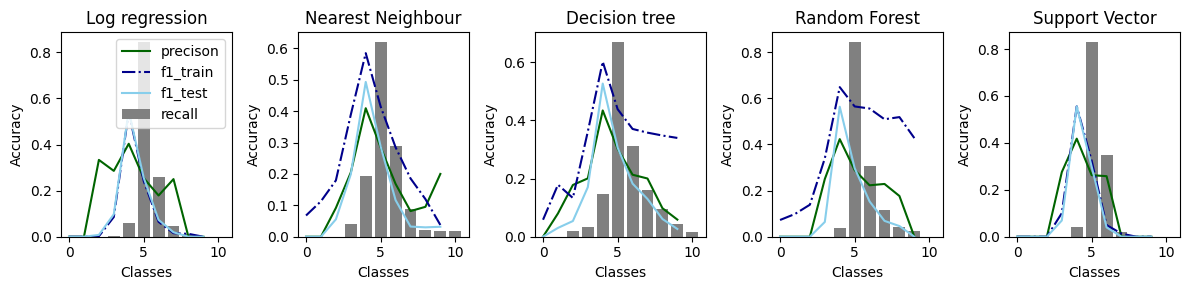

In [50]:

fig, ax = plt.subplots(1,5, figsize=(12,3))

i = 0 


#y_test = y_scaler.inverse_transform(y_test)
#y_train = y_scaler.inverse_transform(y_train)

class_names = [1,2,3,4,5,6,7,8,9,10]

results = []  # Store evaluation metrics for each classifier
models = {}  # Store trained models
confusion = {}  # Store confusion matrices for each classifier
class_report = {}  # Store classification reports for each classifier


for name, model in best_models.items():
    test_pred = model.predict(X_test)
    #test_pred = y_scaler.inverse_transform(test_pred.reshape(-1,1))
    #mse = mean_squared_error(y_test, y_pred)
    test_mse = round(mean_squared_error(y_test, test_pred), 4)
    test_r2 = round(r2_score(y_test, test_pred), 4)
    
    train_pred = model.predict(X_train)
    #train_pred = y_scaler.inverse_transform(train_pred.reshape(-1,1))
    train_mse = round(mean_squared_error(train_pred, y_train), 4)
    train_r2 = round(r2_score(train_pred, y_train), 4)
    
    #print(f"{name} Test MSE: {mse}")
    #print(f"{name} R squared: {metrics.r2_score(y_test,y_pred)}")
    
    title_str = f"{name} \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"


    
    # Assuming y_true and y_pred are your true and predicted labels

    # Calculate evaluation metrics
    accuracy  = metrics.accuracy_score(y_test, test_pred)
    precision = metrics.precision_score(y_test, test_pred, average= 'weighted')
    recall    = metrics.recall_score(y_test, test_pred,average= 'weighted')
    
    f1        = metrics.f1_score(y_train, train_pred,average = 'weighted')    
    f1_test   = metrics.f1_score(y_test, test_pred,average= 'weighted')    
    
    # Save the results to dictionaries
    #models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, train_pred)
    class_report[name] = metrics.classification_report(y_train, train_pred)
    
    # Append results to the list
    results.append([name, accuracy, precision, recall, f1, f1_test])

    #per class analysis 
    precision = metrics.precision_score(y_test, test_pred, average=None)
    recall    = metrics.recall_score(y_test, test_pred,average= None)
    
    f1        = metrics.f1_score(y_train, train_pred,average = None)    
    f1_test   = metrics.f1_score(y_test, test_pred,average= None)    



    ax[i].bar(class_names,recall, label = 'recall',color ='gray')
    ax[i].plot(precision,label = 'precison', color ='darkgreen')
    ax[i].plot(f1, label =  'f1_train', linestyle = '-.', color = 'darkblue')
    ax[i].plot(f1_test, label = 'f1_test',color='skyblue')
    ax[i].set_xlabel('Classes')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(f'{name}')
    ax[0].legend()


    
    #ax[i].set_title(title_str)
    #ax[i].set_xlabel('Actual')
    #ax[i].set_ylabel('Predicted')
    #ax[i].plot(y_test, y_test, 'r')
    #ax[i].scatter(y_test, test_pred)
    i = i+1

fig.tight_layout()

results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test'])
results.set_index('Classifier', inplace= True)

        
#Add progress bar

In [51]:
results

Accuracy  Precision    Recall  F1 Train   F1 Test
Classifier                                                          
Log regression     0.361531   0.289964  0.361531  0.257727  0.267603
Nearest Neighbour  0.320575   0.266454  0.320575  0.406993  0.281591
Decision tree      0.344954   0.293041  0.344954  0.438460  0.304393
Random Forest      0.375914   0.285285  0.375914  0.505532  0.287034
Support Vector     0.369332   0.269558  0.369332  0.280485  0.271025

**Remark**

* The high F1 train values comapred to the low F1 test volumes for all models, suggest that modes are overfitting again this is due to class imbalance in our data

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

Random forest is by far the best for both regression and classification, we find out which is better between the two, by appliying further gridsearch and cross validation. Ouput a view that comapress the regressor and classifier metrics tie it back to the final profit score predictions 

**Best regression model validation**

In [52]:


#Include product (first convert to numeric)
X = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
        'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]

#y = df_copy[['Probability','Profit_score']]
y = df_copy[['Probability']]

#y_train = y_train[['Probability']]
#y_profit_score =  y_test[['Profit_score']]
#y_test = y_test[['Probability']]


x_scaler = StandardScaler()
#y_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(X)
#y_scaled = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42)


models = {
    'Random Forest': RandomForestRegressor()
    
}

param_grid = {
    'Random Forest': { 'n_estimators': [100],
                    'max_depth': [5,8,10,15],
                    'max_features': ['auto', 'sqrt', 'log2']}
     
    
}

y_train = np.array(y_train).ravel()

# Perform Grid Search
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train.ravel())
    best_models[name] = grid_search.best_estimator_

    print(best_models)
# Evaluate the best model
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    #mse = mean_squared_error(y_test, y_pred)
    test_mse = round(mean_squared_error(y_test, y_pred), 4)
    test_r2 = round(r2_score(y_test, y_pred), 4)
    
    y_pred = model.predict(X_train)
    train_mse = round(mean_squared_error(y_pred, y_train), 4)
    train_r2 = round(r2_score(y_pred, y_train), 4)
    



C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\

{'Random Forest': RandomForestRegressor(max_depth=10, max_features='log2')}


In [53]:
regression = best_models['Random Forest'] 

In [54]:
regression

RandomForestRegressor(max_depth=10, max_features='log2')

**Best classification model validation**

In [55]:
#Include product (first convert to numeric)
X = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
        'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]

#y = df_copy[['Probability','Profit_score']]
y = df_copy[['Profit_score']]

#y_train = y_train[['Probability']]
#y_profit_score =  y_test[['Profit_score']]
#y_test = y_test[['Probability']]


x_scaler = StandardScaler()
#y_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(X)
#y_scaled = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42)


models = {
    'Random Forest': RandomForestClassifier()
    
}

param_grid = {
    'Random Forest': { 'n_estimators': [100],
                    'max_depth': [5,10, 12,],
                    'max_features': ['auto', 'sqrt', 'log2']}
     
    
}

y_train = np.array(y_train).ravel()


# Perform Grid Search
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train.ravel())
    best_models[name] = grid_search.best_estimator_

    print(best_models)
# Evaluate the best model
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    #mse = mean_squared_error(y_test, y_pred)
    test_mse = round(mean_squared_error(y_test, y_pred), 4)
    test_r2 = round(r2_score(y_test, y_pred), 4)
    
    y_pred = model.predict(X_train)
    train_mse = round(mean_squared_error(y_pred, y_train), 4)
    train_r2 = round(r2_score(y_pred, y_train), 4)
    

C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\

{'Random Forest': RandomForestClassifier(max_depth=5, max_features='log2')}


In [56]:
classifier =  best_models['Random Forest'] 

In [57]:
classifier

RandomForestClassifier(max_depth=5, max_features='log2')

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


#### **Model selection**

In [58]:
reg_pred = regression.predict(X_test)
reg_pred = np.ceil(reg_pred*10)
reg_pred

array([5., 4., 5., ..., 6., 5., 6.])

In [59]:
cl_pred = classifier.predict(X_test)
#cl_pred = np.ceil(reg_pred*10)/10
cl_pred

array([5., 5., 5., ..., 5., 5., 5.])

In [60]:

results = []  # Store evaluation metrics for each classifier
models = {}  # Store trained models
confusion = {}  # Store confusion matrices for each classifier
class_report = {}  # Store classification reports for each classifier


for test_pred,name in zip([reg_pred,cl_pred],['regression','classifier']):
    print(test_pred,name)
 
    accuracy  = metrics.accuracy_score(y_train, train_pred)
    precision = metrics.precision_score(y_train, train_pred, average= 'weighted')
    recall    = metrics.recall_score(y_train, train_pred,average= 'weighted')
    
    f1        = metrics.f1_score(y_train, train_pred,average = 'weighted')    
    f1_test   = metrics.f1_score(y_test, test_pred,average= 'weighted')    
    
    results.append([name, accuracy, precision, recall, f1, f1_test])

    #per class analysis 
    #precision = metrics.precision_score(y_train, train_pred, average=None)
    #recall    = metrics.recall_score(y_train, train_pred,average= None)
    
    #f1        = metrics.f1_score(y_train, train_pred,average = None)    
    #f1_test   = metrics.f1_score(y_test, test_pred,average= None)    


results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test'])
results.set_index('Model', inplace= True)

results.reset_index()
#Add progress bar

[5. 4. 5. ... 6. 5. 6.] regression
[5. 5. 5. ... 5. 5. 5.] classifier


C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model  Accuracy  Precision    Recall  F1 Train   F1 Test
0  regression  0.378787   0.339975  0.378787  0.280485  0.315074
1  classifier  0.378787   0.339975  0.378787  0.280485  0.270104

**Remark**

* The random forest regressor and classifier have the same accuracy, precision, recall, f1_train.
* However, regression has a higher f1 test and it is high than the f1 train value, indicating it generalizes silightly better than the classifier.
* For the sake of leveraging the classification report and class imbalance resolution we will go with the classficiation model as our final model and improve it.

In [61]:
print(classification_report(y_test, cl_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        28
         2.0       0.00      0.00      0.00       107
         3.0       0.00      0.00      0.00       252
         4.0       0.43      0.00      0.01       682
         5.0       0.41      0.88      0.56      1416
         6.0       0.29      0.30      0.29       878
         7.0       0.21      0.07      0.10       370
         8.0       0.40      0.04      0.07       198
         9.0       0.00      0.00      0.00       113
        10.0       0.00      0.00      0.00        58

    accuracy                           0.38      4102
   macro avg       0.17      0.13      0.10      4102
weighted avg       0.31      0.38      0.27      4102



C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vuyis\anaconda3\envs\EDSA\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


As you can see, this gives us an overall accuracy of 21% (this is the percentage of times we predict the correct class in the data). We also get a weighed F1 score of 0.07. Now, besides these numbers, there are a lot of other issues here – the biggest one being that our model never predicts some of the classes. 

That said, the model is not completely useless since it does slightly better than random guessing. 

Regression was the best, due to model imbalance, we try PCA to see if it improves the model in any way.

#### **Model improvement: Class balance**

In [63]:
grouped = df_copy.groupby(['Profit_score']).count().reset_index()[['Profit_score','Id']]


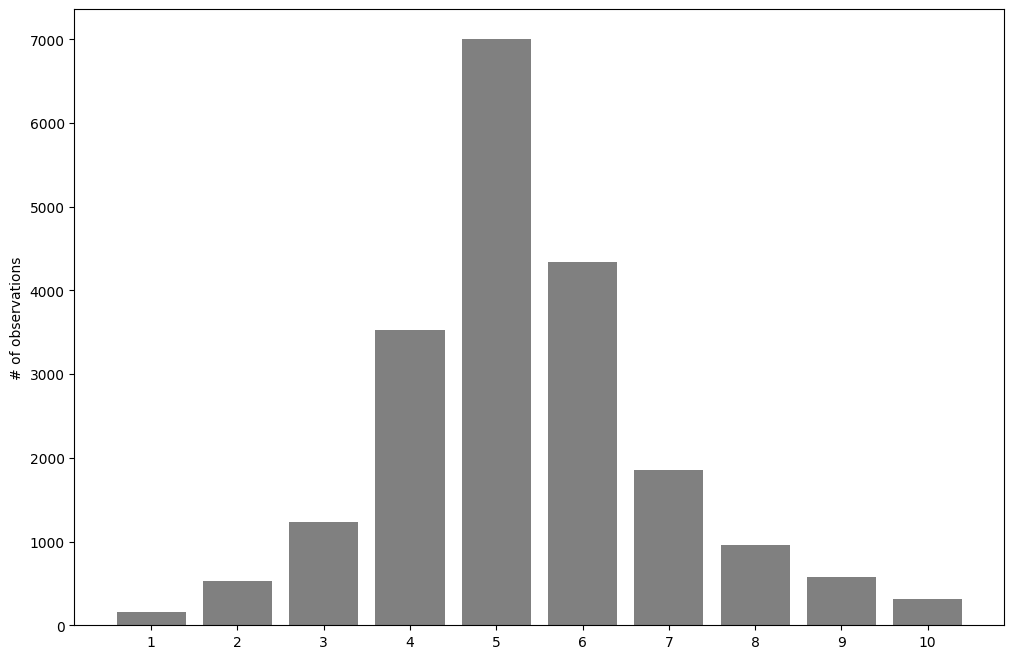

In [64]:
plt.bar(grouped.Profit_score,grouped.Id,color='grey')
plt.xticks(range(1,11,1))
plt.ylabel("# of observations")
plt.show()

In [65]:
X = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
        'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]

#y = df_copy[['Probability','Profit_score']]
y = df_copy[['Profit_score']]

X = np.array(X)

y = np.array(y)

In [66]:
# Before resampling, let's stitch our features and labels together
data = np.concatenate([X, y], axis=1)

In [67]:
grouped_df = grouped.set_index('Profit_score')

In [68]:
grouped_df

Id
Profit_score      
1.0            161
2.0            532
3.0           1232
4.0           3531
5.0           7009
6.0           4344
7.0           1851
8.0            954
9.0            581
10.0           312

In [69]:
# As usual, we start by importing our modules

# Let's pick a class size of roughly half the size of the largest size
class_size = 3000

resampled_classes = []

# For each label
for label in range(1,11):
    # Get num. of observations from this class
    label_size = grouped_df.loc[label]['Id']
    
    # If label_size < class size the upsample, else downsample
    if label_size < class_size:
        # Upsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=True, # sample with replacement (we need to duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
    else:
        # Downsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=False, # sample without replacement (no need for duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
        
    resampled_classes.append(label_resampled)

In [70]:
resampled_data = np.concatenate(resampled_classes, axis=0)

In [71]:
resampled_data.shape

(30000, 9)

In [72]:
X_resampled = resampled_data[:,:-1]

In [73]:
y_resampled = resampled_data[:,-1]

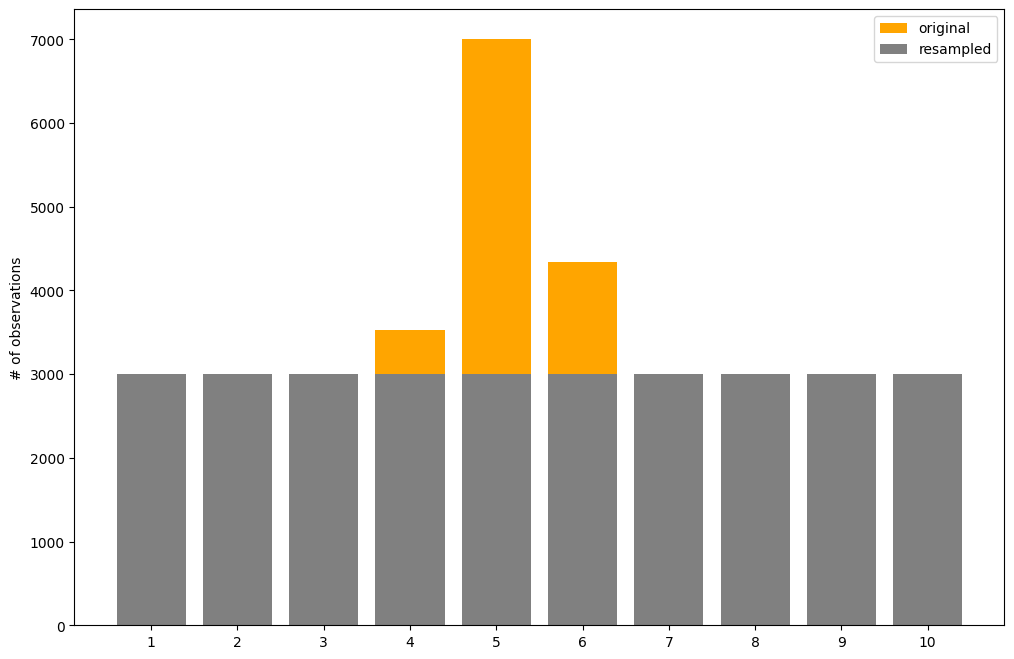

In [74]:
ps= [len(y_resampled[y_resampled == label]) for label in range(1,11)]
bars_resampled = pd.DataFrame(zip(ps, range(1,11)), columns=['heights','labels'])
bars_resampled = bars_resampled.sort_values(by='heights',ascending=True)

plt.bar(grouped.Profit_score,grouped.Id,color='orange')
plt.bar(range(1,11),bars_resampled['heights'],color='grey')
plt.xticks(range(1,11,1))
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size = 0.20,
                                                    random_state = 42)

final_model =  RandomForestClassifier(max_depth=10,max_features='log2',n_estimators=100)

In [76]:
final_model.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=10, max_features='log2')

In [77]:

y_pred = final_model.predict(X_test)
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

         1.0       0.69      0.99      0.82       567
         2.0       0.55      0.82      0.66       612
         3.0       0.47      0.59      0.52       609
         4.0       0.41      0.10      0.16       635
         5.0       0.34      0.25      0.29       625
         6.0       0.29      0.21      0.24       591
         7.0       0.51      0.53      0.52       576
         8.0       0.66      0.69      0.67       595
         9.0       0.81      0.80      0.80       618
        10.0       0.84      0.93      0.89       572

    accuracy                           0.59      6000
   macro avg       0.56      0.59      0.56      6000
weighted avg       0.55      0.59      0.55      6000



#### **ROC curve**

10


C:\Users\vuyis\AppData\Local\Temp\ipykernel_7028\3035072084.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, color = 'red')


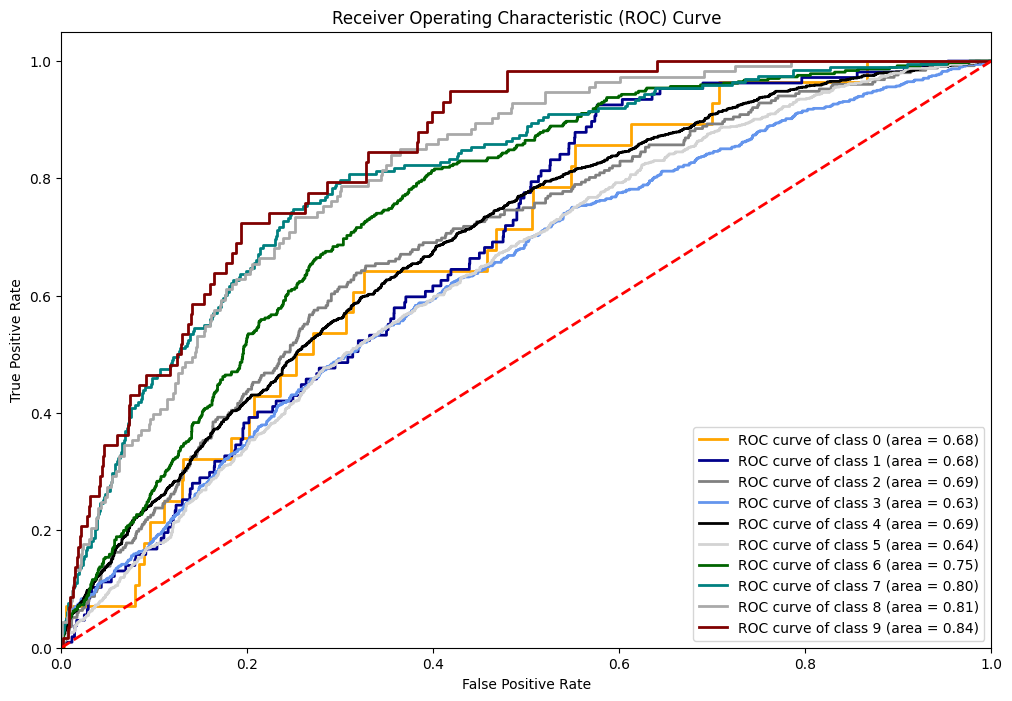

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

#Include product (first convert to numeric)
X = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
        'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]

#y = df_copy[['Probability','Profit_score']]
y = df_copy[['Profit_score']]
y = label_binarize(y, classes= [*range(1,11)])
n_classes = y.shape[1]
print(n_classes)

x_scaler = StandardScaler()
#y_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train a classifier
final_model.fit(X_train, y_train)

# Predict probabilities
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['orange','darkblue', 'gray','cornflowerblue', 'black', 'lightgray','darkgreen','teal','darkgray','maroon']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2, color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Remark**

* The area curves of each class is above 0.6 suggest a fairly decent classification model.



#### **Saving model for streamlit**

In [80]:
X = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
        'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]

#y = df_copy[['Probability','Profit_score']]
y = df_copy[['Profit_score']]

X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size = 0.20,
                                                    random_state = 42)

final_model =  RandomForestClassifier(max_depth=10,max_features='log2',n_estimators=100)
final_model.fit(X_train, y_train.ravel())


path = os.getcwd()

#joblib.dump(best_models['Random Forest'] , path + '\\Streamlit\\prediction_model.pkl')

joblib.dump(final_model, path + '\\Streamlit\\prediction_model.pkl')


['C:\\Users\\vuyis\\OneDrive\\EDSA\\Workplace_project\\Streamlit\\prediction_model.pkl']

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* There wasn't any strong correlation come through of the predictore variables to the response variable. Multicolinearity too was not an issue with the feature. Variables that did have weak correlation to prfoitability was salary, loan amount, spend percentage and months on book
* We expected some correlation between profitability and probability of default. However there was none with internal PD and a very weak correlation to external PD. Suggesting that profit score capture information that credit score would not necessary take into account but are equally important.
* The final model had an accuracy of 37%, however data suffered from class imbalance, resolving class imbalance by upscale rebalancing improved the accuracy to 59%
* From our observation , feature related improvements need to be done to improve the accuracy, it's either the feature we currently have are not the best predictors or there are some feature introducing noise to the model leading to suboptimal predictions.
* In the futur, we will include other additional predictor variable. Since adding more variables increase the complexity of the model we will perform PCA to reduce the dimensions and pick PCAs that represents most of the variance.
* Future we will explore the use of other more advanced models like relu in nueral netowrks to capture non lienar relations better.
---


---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

<div style="background-color: #f0f0f0; border-left: 6px solid #ccc; padding: 10px;">
  <strong>Profit scoring. (2016).</strong> The use of profit scoring as an alternative to credit scoring systems in peer-to-peer (P2P) lending. Retrieved from <a href="https://www.sciencedirect.com/science/article/abs/pii/S0167923616301063#:~:text=Profit%20scoring%20systems%20estimate%20loan%20profitability%20%28internal%20rate,the%20results%20obtained%20by%20a%20credit%20scoring%20system.">https://www.sciencedirect.com/science/article/abs/pii/</a>.
</div>

<div style="background-color: #f0f0f0; border-left: 6px solid #ccc; padding: 10px;">
  <strong> Support Vector machines. (2020).</strong> Matplotlib: Support vector machines for regression. Retrieved from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html</a>.
</div>


<div style="background-color: #f0f0f0; border-left: 6px solid #ccc; padding: 10px;">
  <strong> CLass imbalance (2024).</strong> How to Handle Imbalanced Classes in Machine Learning. Retrieved from <a href="https://www.geeksforgeeks.org/how-to-handle-imbalanced-classes-in-machine-learning/">https://www.geeksforgeeks.org/how-to-handle-imbalanced-classes-in-machine-learning/</a>.
</div>


## Additional Sections to Consider

* ### Appendix: 

### Links
In case you may have missed the links in the notebook:

* PowerBI dashboard for further exploratory data analysis: [PowerBI](https://app.powerbi.com/groups/me/reports/442ae843-7963-4a78-a942-023e1c6e6f03/5bfcac1093ef468c19e8?redirectedFromSignup=1&experience=power-bi)
* Google slides for the final presentation: [Presentation slides](https://docs.google.com/presentation/d/1LY5Smb_PuqboQQasrJBPjQyH3A2vt6ji4ydF6Vteieg/edit#slide=id.gc6f980f91_0_33)
  
* Streamlit app for predicting the score of a given client portfolio:
* Trello for project management: [Trello](https://trello.com/b/xmYPabfb/workplace-project)
  

### Contributors: 
Vuyiswa Kubalasa
